In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import wfdb as wfss
import random

In [3]:
mask_normal = np.load('./MIT-BIH_Normal/MIT-BIH Normal_(4000,10000,2)(1).npy')

In [4]:
one_normal = []
#for i in range(0, len(one_normal)):
for i in range(0, 100):
    t0 = mask_normal[i][:,0]
    one_normal.append(t0)

In [5]:
## sample_data.shape is (number, data).
## range_grid is Scope of Grid.
## standard_val is Base value for data.
## all_peak_index is return array
## all_peak_index shape is (number, data).

def grid_show(sample_data, range_grid, standard_val):
    number_grid = int(10000/range_grid)
    all_peak_index = []
    range_peak_index = []
    #shift_grid_range = 50
    shift_grid_range = int(range_grid/5)
    shift_count = 0
    
    print('Standard_Val: ',standard_val)
    
    #500 크기의 data 반복
    for j in range(0, number_grid):
        data = sample_data[range_grid*j:range_grid*(j+1)]   #500개씩 자르기
        peak_index = []
        
        # 오류 정정 :: 데이터 우측으로 shift_grid_range씩 이동부
        if standard_val > max(data):
            shift_count += 1
            #for t in range(1, 6): #shift_grid_range * 5 == range_grid
            for t in range(1, 6): #shift_grid_range * 5 == range_grid
                data = sample_data[(range_grid*j)+(shift_grid_range*t):(range_grid*(j+1))+(shift_grid_range*t)]   #range_grid divide
                
                if len(data) < range_grid:
                    print('Detect NONE')
                    break
                
                ## data의 마지막 단에서 데이터가 밀리는 현상을 방지한다. 검출부 [
                pre_end_data = data[-(shift_grid_range)]
                now_end_data = data[-1]
                if pre_end_data == now_end_data:
                    break
                ## data의 마지막 단에서 데이터가 밀리는 현상을 방지한다. 검출부 ]
                
                if standard_val < max(data):
                    break                    
        else:
            t = 0        
        peak_val = max(data)
                
        #peak index 뽑아내기.
        for k in range(0, len(data)):
            datat = data[k]
            if standard_val < datat == peak_val:
                peak_index = k
                break
                
            ## data의 마지막 단에서 데이터가 밀리는 현상을 방지한다. 비주얼부 [
            #if len(data) < range_grid:
            if len(data) < range_grid:
                #print('length',len(data))
                peak_index = range_grid-(shift_grid_range*t)-1
             ## data의 마지막 단에서 데이터가 밀리는 현상을 방지한다. 비주얼부 ]
            
            else:
                peak_index = 0
        
        #print(peak_index)
        #print(range_grid*j)
        #print(shift_grid_range*t)
        
        ##500씩 나눈 횟수(j)와 100씩 이동한 횟수(t)를 반영한 one_normal index [
        real_peak_index = (peak_index + (range_grid*j)+(shift_grid_range*t))
        ##500씩 나눈 횟수(j)와 100씩 이동한 횟수(t)를 반영한 one_normal index ]
        
        ## 마지막으로 자른 파형 오류 잡기
        if real_peak_index == 9999:
            break
        ## 500씩 나눈 데이터의 끝점에서 피크 인덱스가 형성되는 경우를 막는 조건 [
        if sample_data[real_peak_index] < sample_data[real_peak_index+1]:
            for der in range(1, 500):
                pre_point = sample_data[real_peak_index+der]
                next_point = sample_data[real_peak_index+der+1]
                if pre_point > next_point:
                    real_peak_index = real_peak_index+der
                    break             
        #print('[',real_peak_index,',',real_peak_index+1,']')
        
        
        ## 500씩 나눈 데이터의 끝점에서 피크 인덱스가 형성되는 경우를 막는 조건 ]
        ## 첫번째 peak_index를 받아오기
        if j == 0:
            range_peak_index.append(real_peak_index)
        ## 인덱스의 거리가 shift_grid_range 보다 큰 차이가 필요함
        if real_peak_index - range_peak_index[-1] > shift_grid_range:
             range_peak_index.append(real_peak_index)
        
    all_peak_index.append(range_peak_index)
    return all_peak_index

Standard_Val:  0.103125
Detect NONE


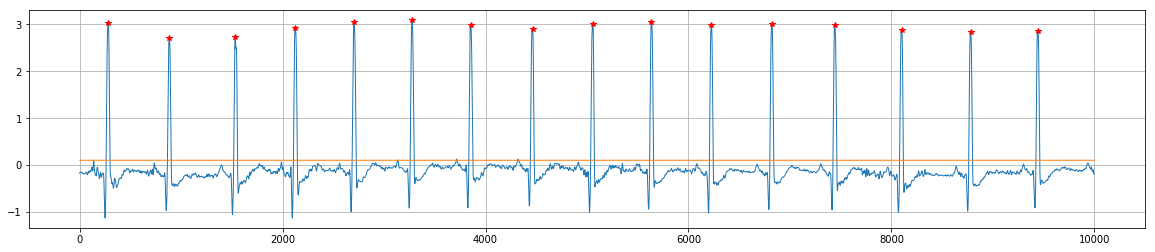

Standard_Val:  0.103125


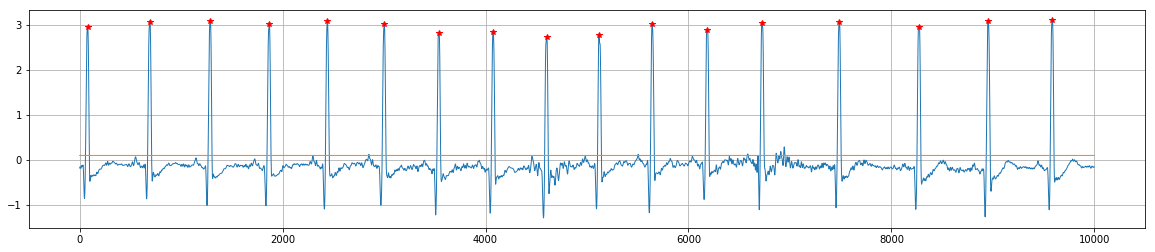

Standard_Val:  0.103125


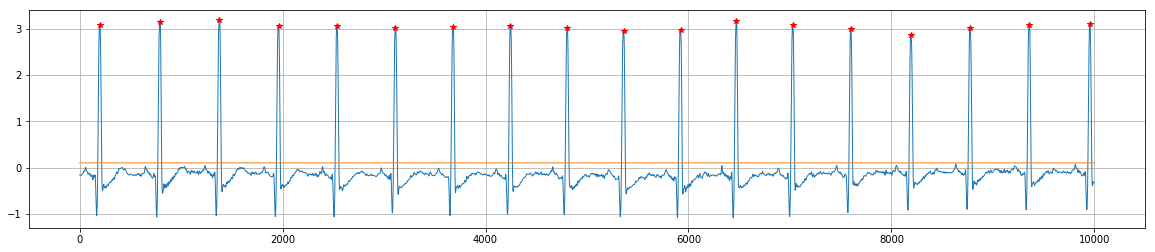

Standard_Val:  0.103125


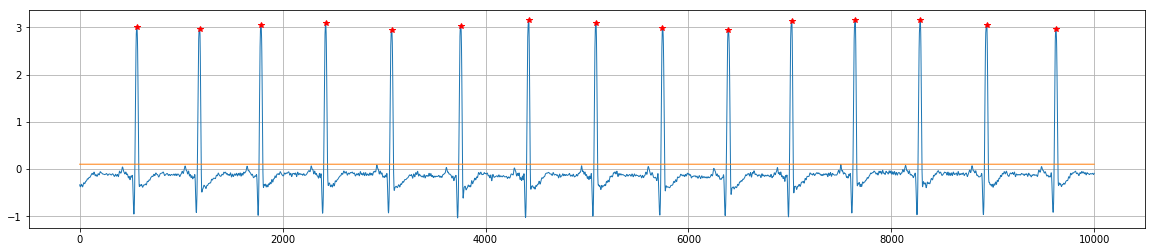

Standard_Val:  0.103125


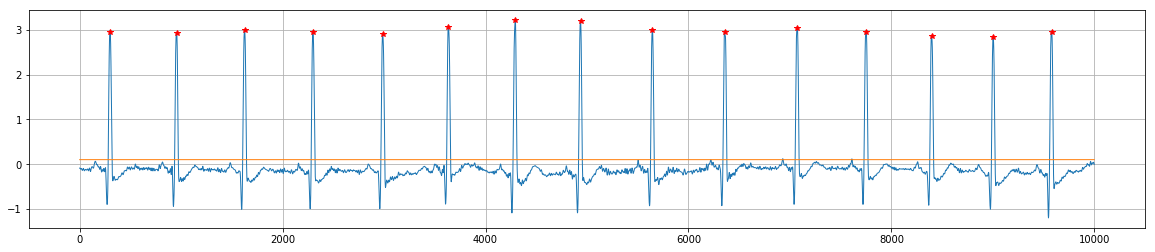

Standard_Val:  0.103125


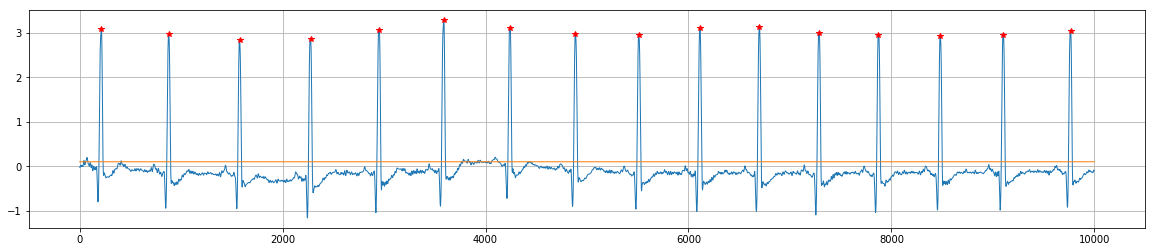

Standard_Val:  0.10312499999999994


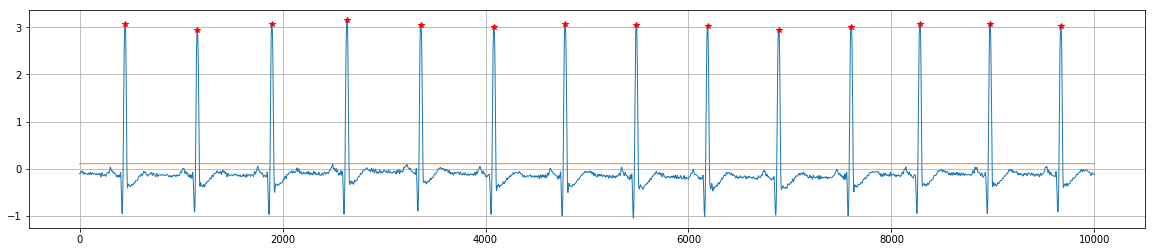

Standard_Val:  0.103125


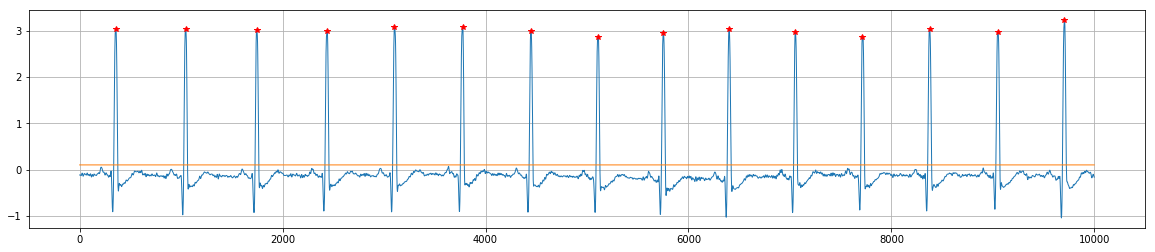

Standard_Val:  0.103125


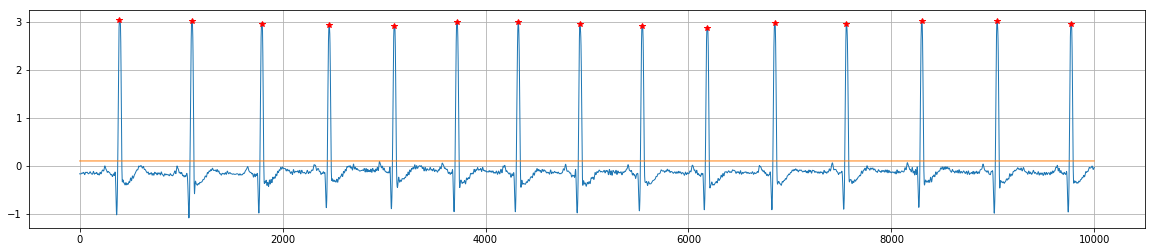

Standard_Val:  0.103125


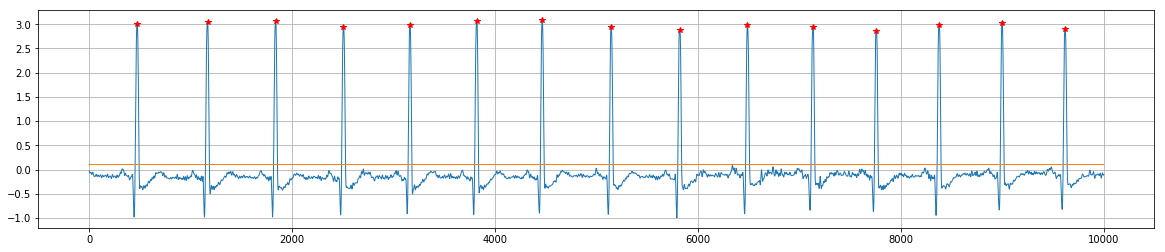

Standard_Val:  0.103125
Detect NONE


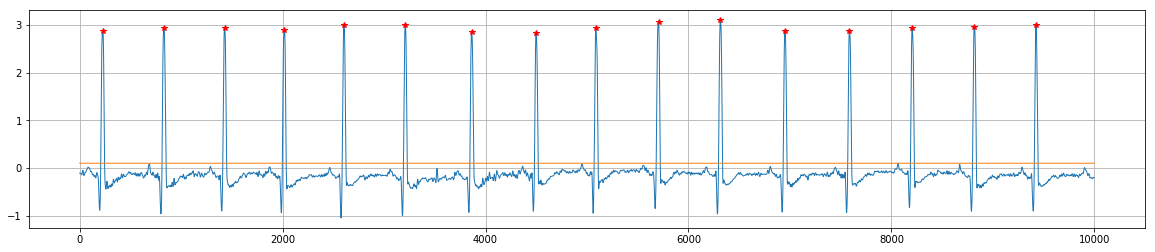

Standard_Val:  0.103125


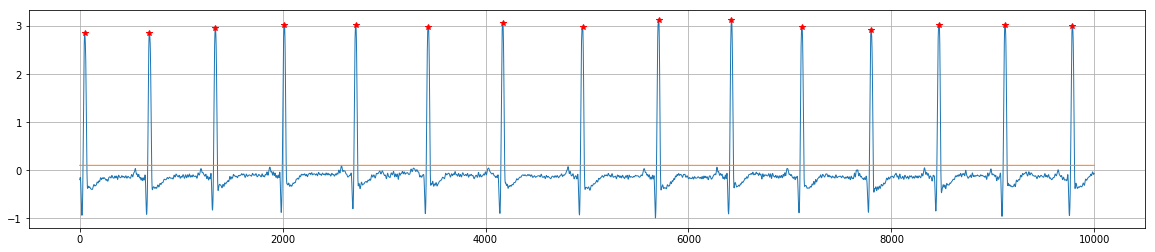

Standard_Val:  0.103125


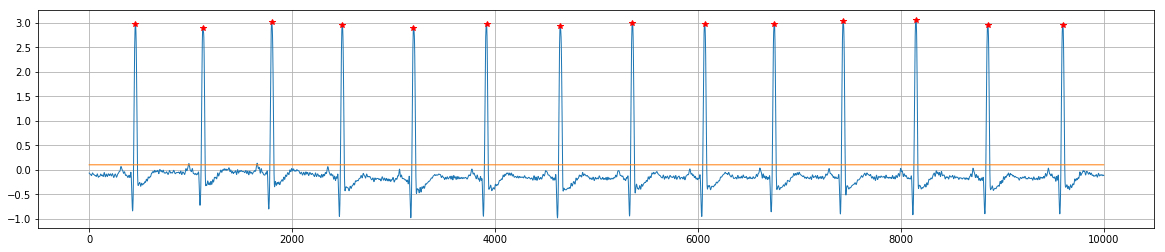

Standard_Val:  0.10312499999999994


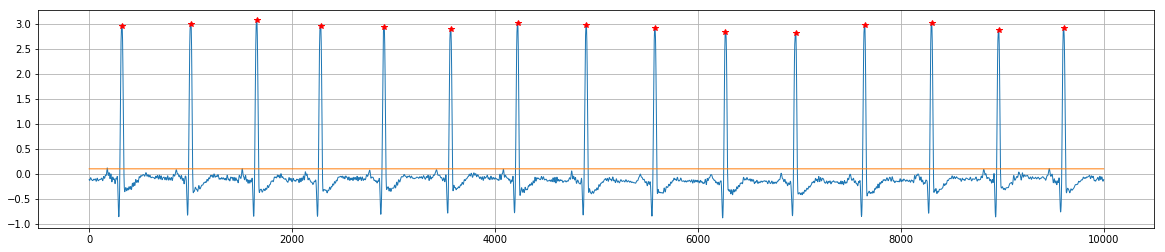

Standard_Val:  0.103125


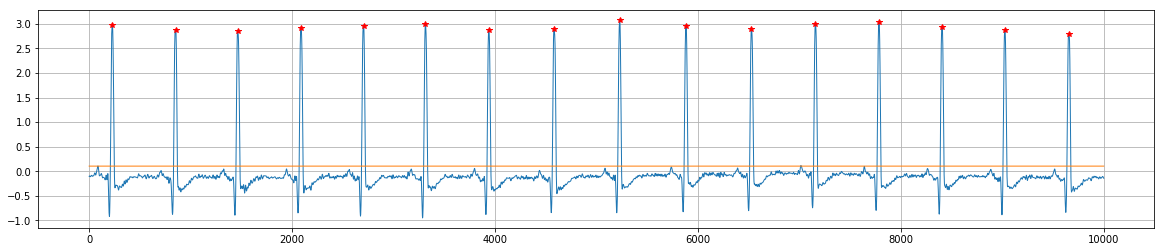

Standard_Val:  0.10312499999999995
Detect NONE


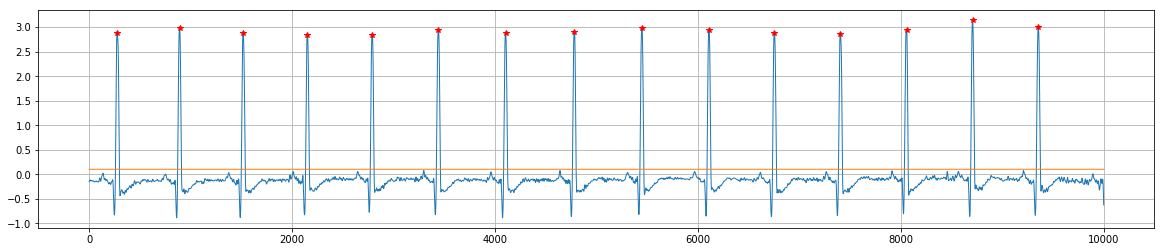

Standard_Val:  0.103125


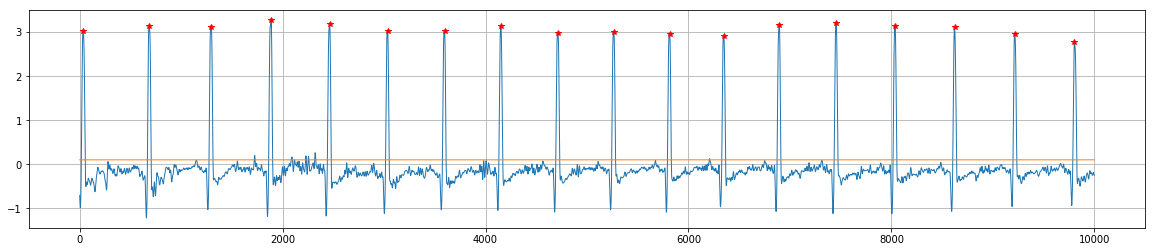

Standard_Val:  0.103125


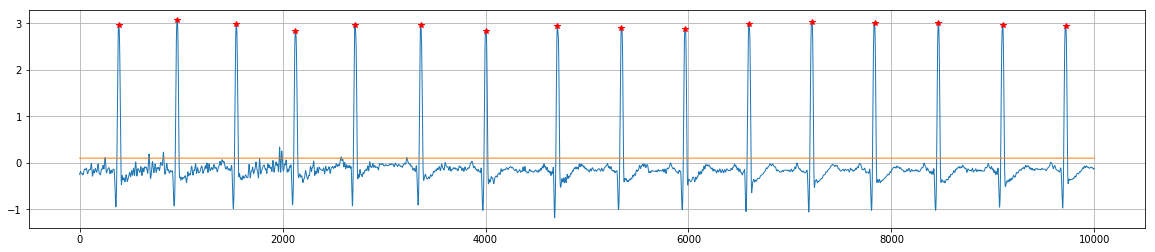

Standard_Val:  0.103125


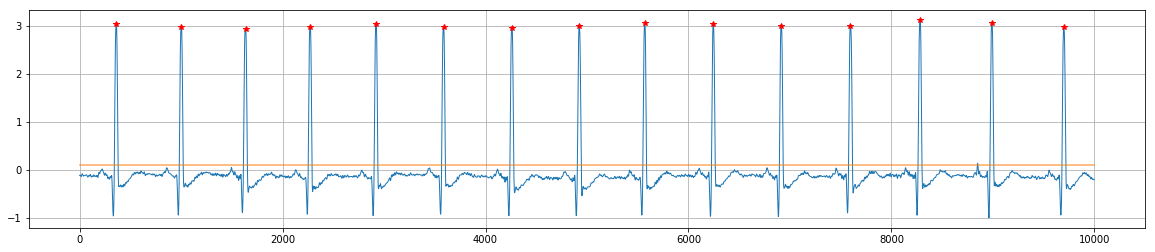

Standard_Val:  0.103125


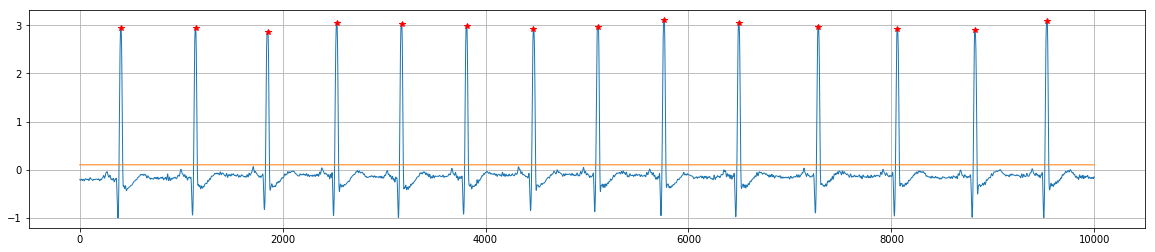

Standard_Val:  0.103125
Detect NONE


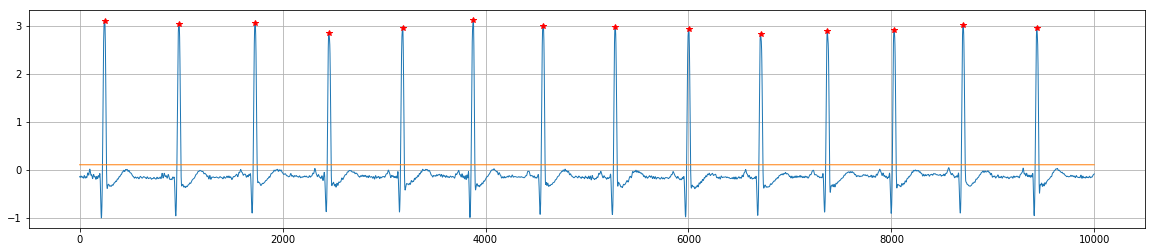

Standard_Val:  0.103125


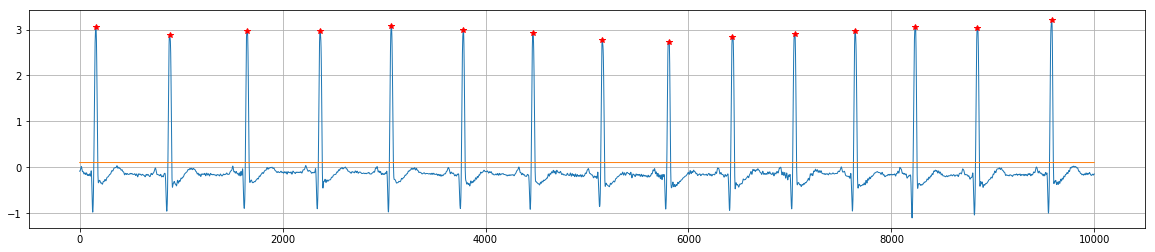

Standard_Val:  0.10312499999999995


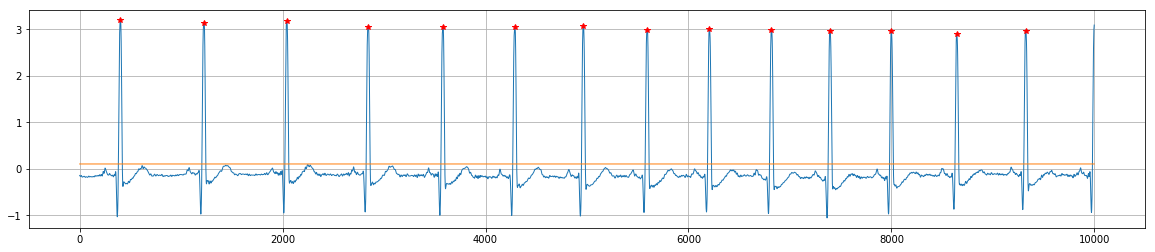

Standard_Val:  0.10312499999999995


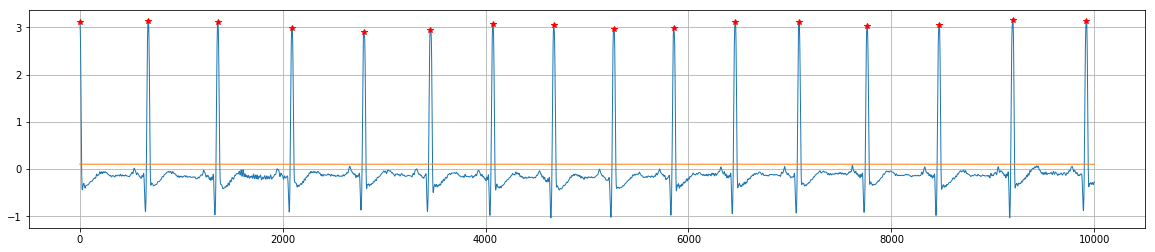

Standard_Val:  0.103125


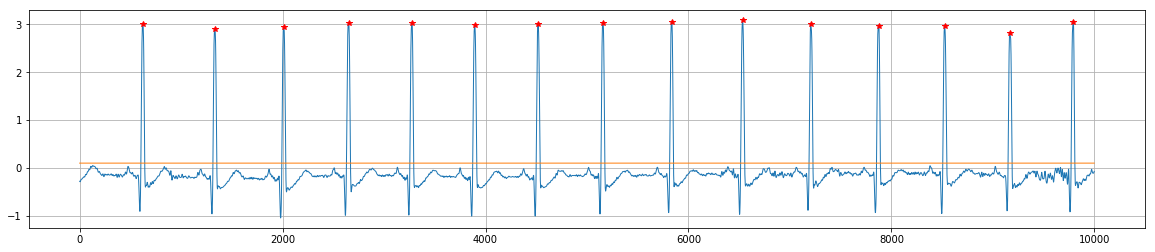

Standard_Val:  0.103125


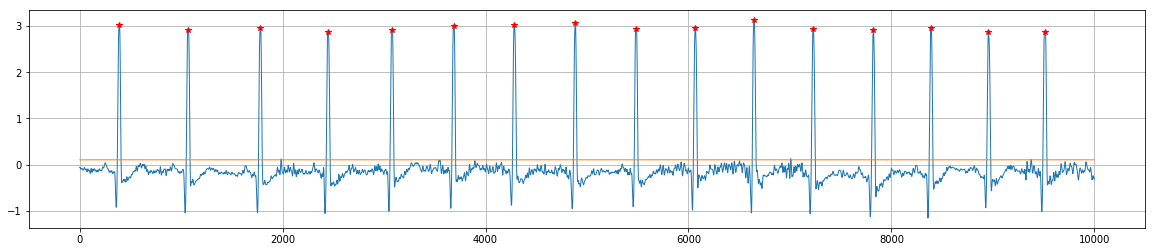

Standard_Val:  0.103125


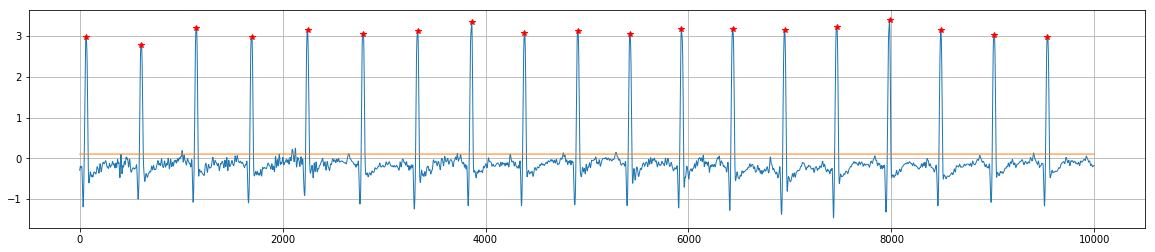

Standard_Val:  0.103125


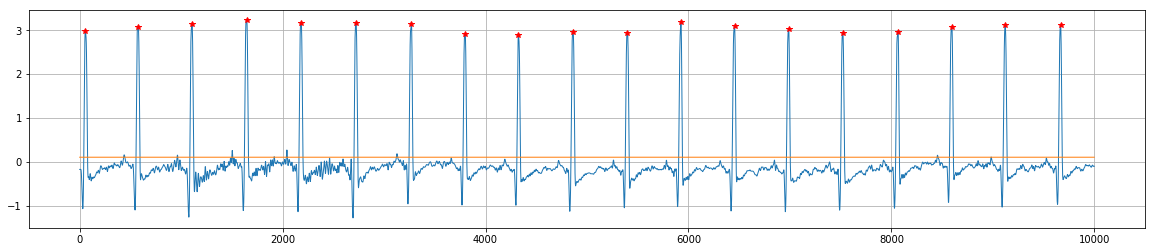

Standard_Val:  0.10312499999999988
Detect NONE


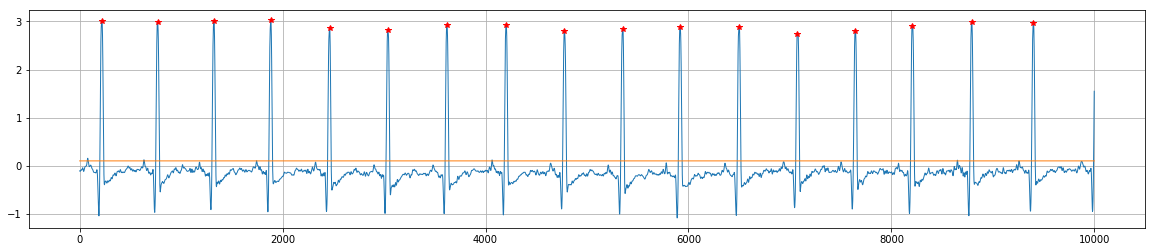

Standard_Val:  0.103125


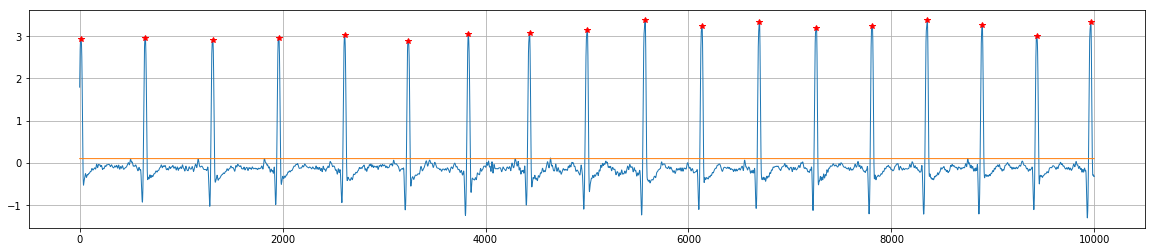

Standard_Val:  0.103125


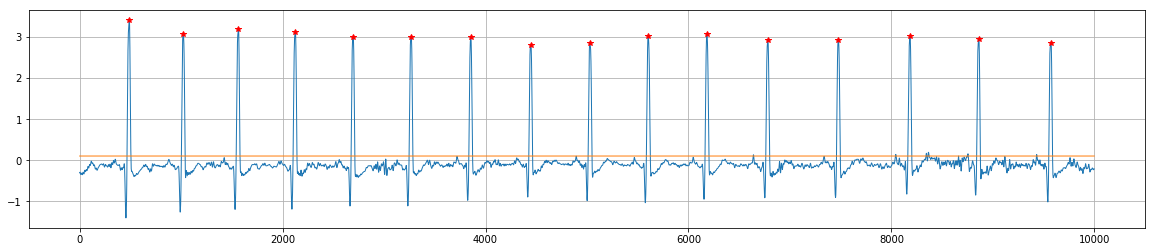

Standard_Val:  0.103125


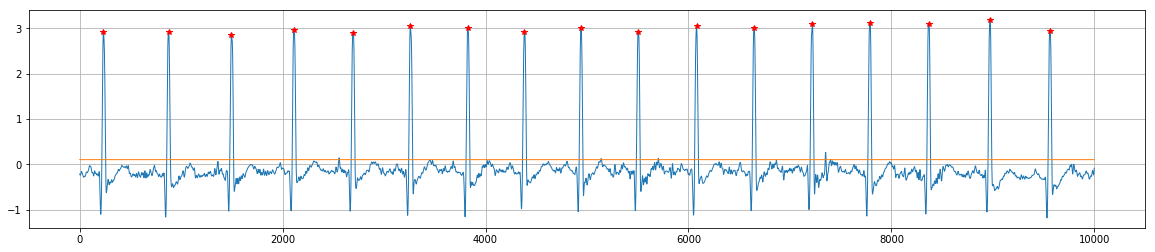

Standard_Val:  0.103125


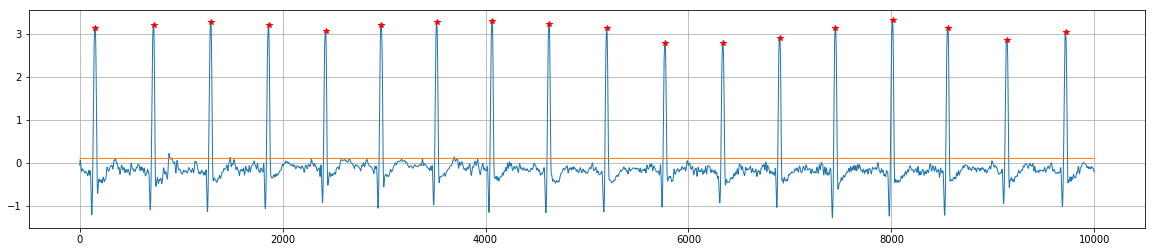

Standard_Val:  0.103125


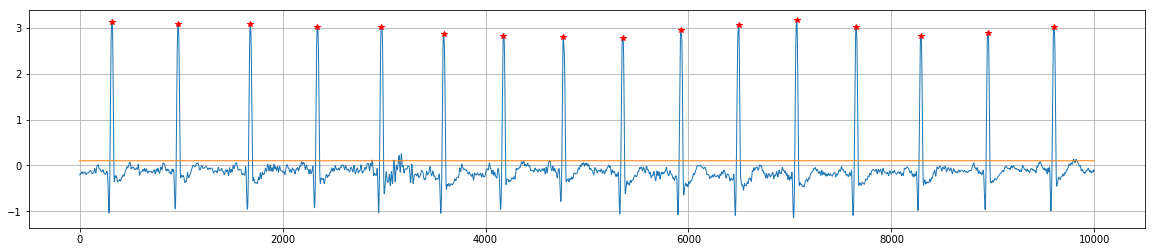

Standard_Val:  0.103125
Detect NONE


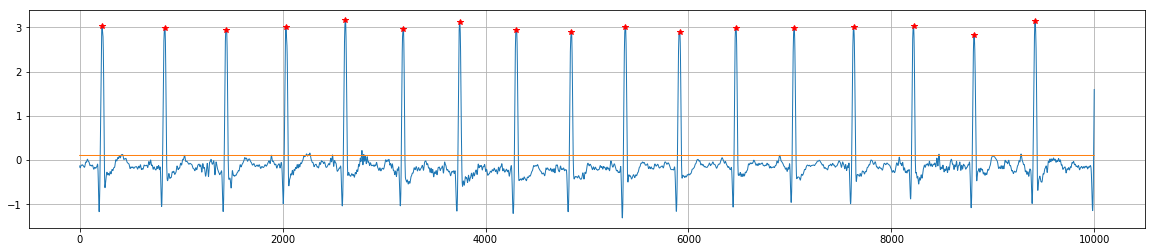

Standard_Val:  0.103125
Detect NONE


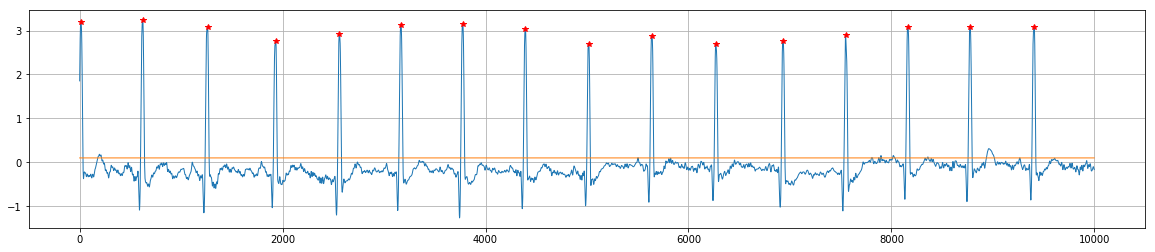

Standard_Val:  0.103125


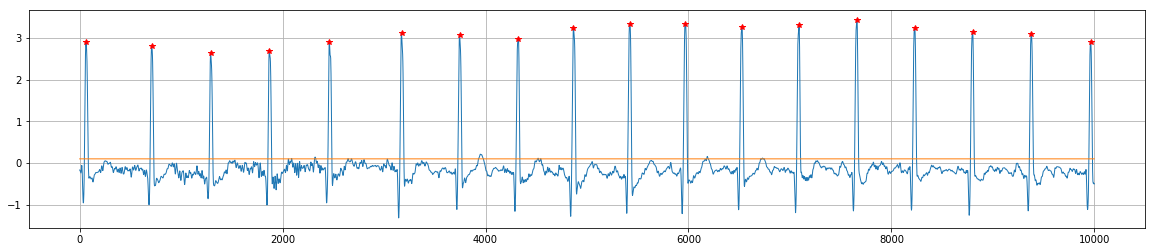

Standard_Val:  0.103125


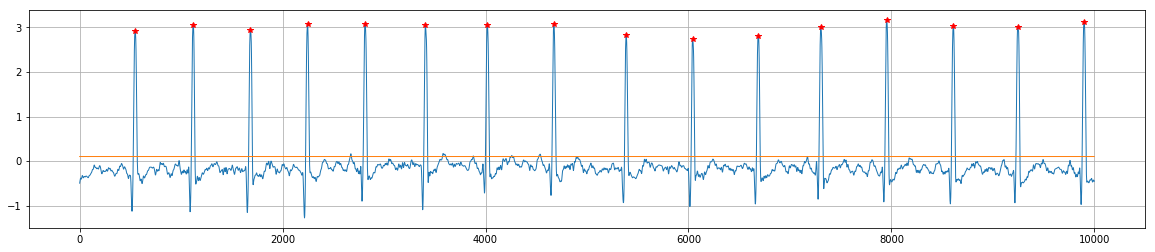

Standard_Val:  0.103125


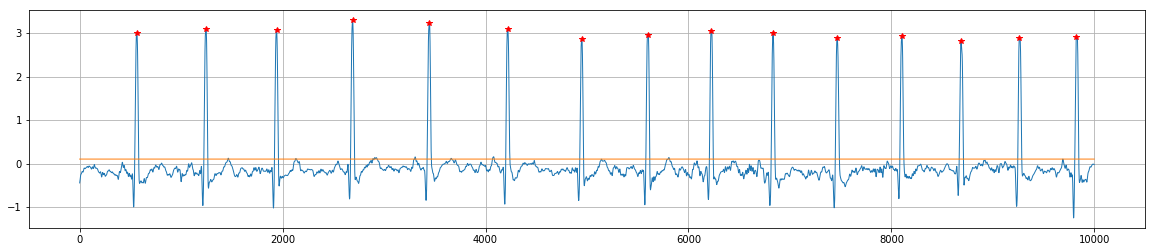

Standard_Val:  0.103125


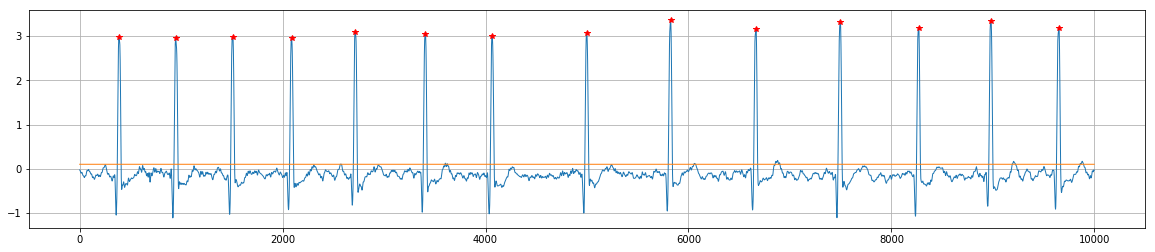

Standard_Val:  0.103125


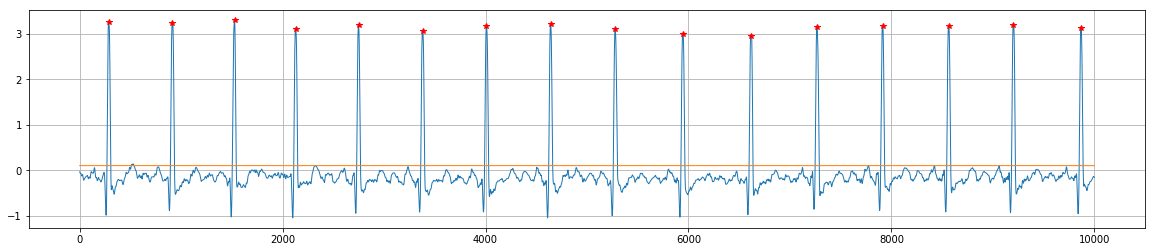

Standard_Val:  0.103125


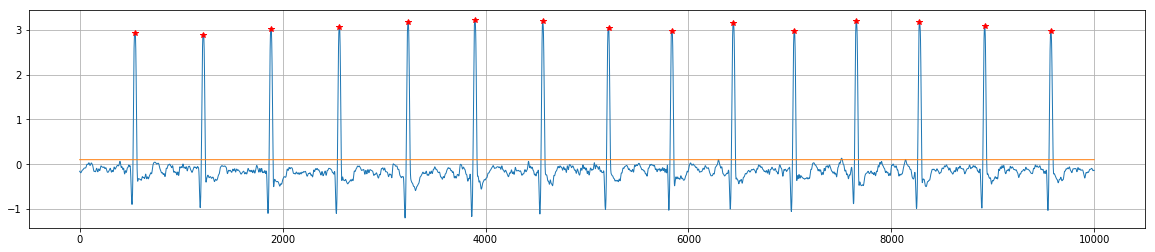

Standard_Val:  0.103125


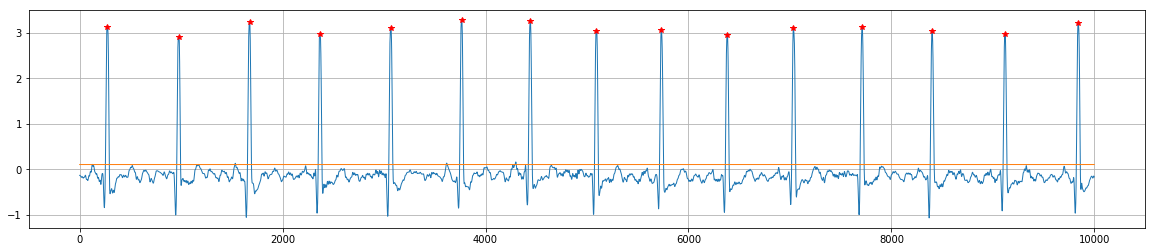

Standard_Val:  0.103125


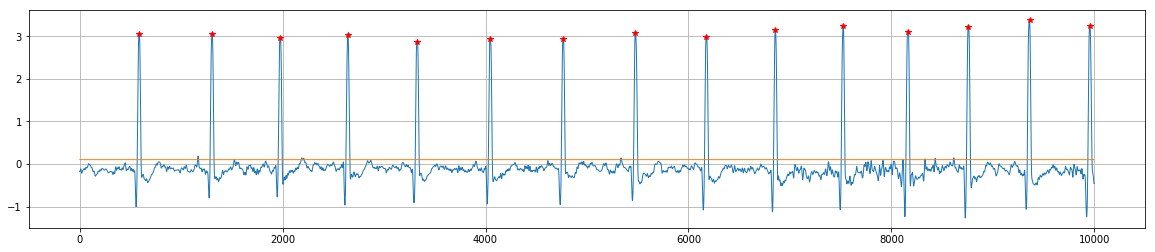

Standard_Val:  0.103125


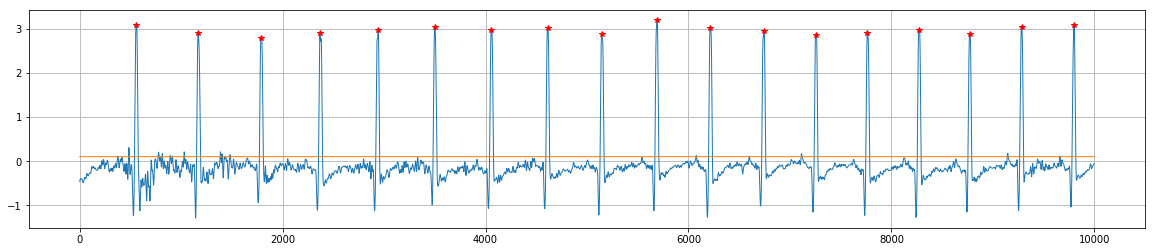

Standard_Val:  0.103125


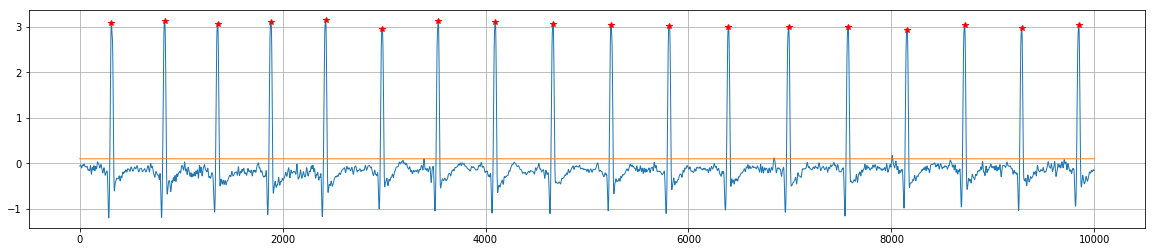

Standard_Val:  0.103125


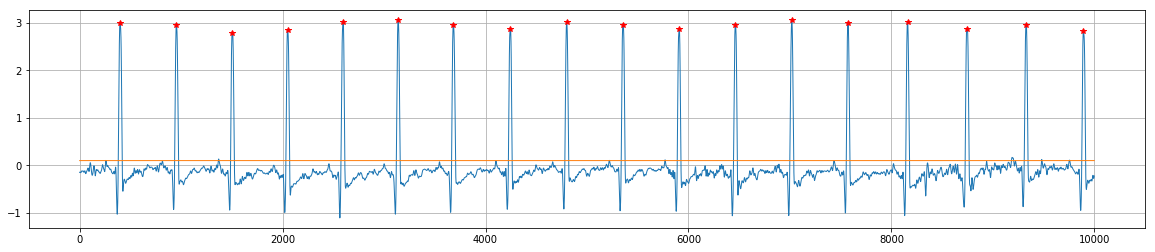

Standard_Val:  0.103125


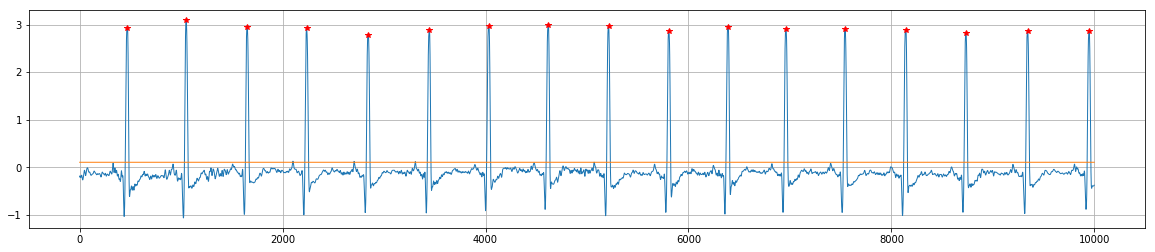

Standard_Val:  0.103125


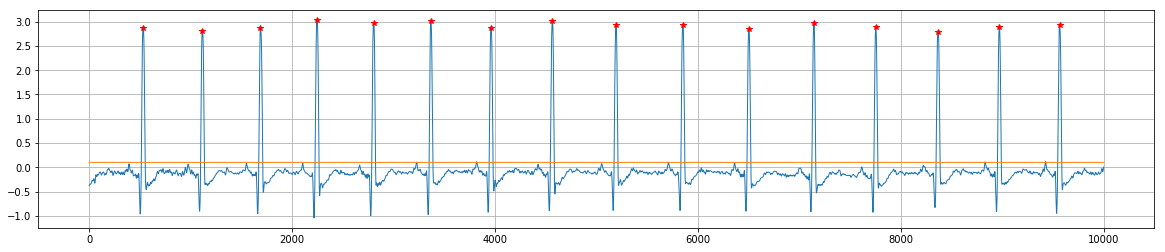

Standard_Val:  0.103125


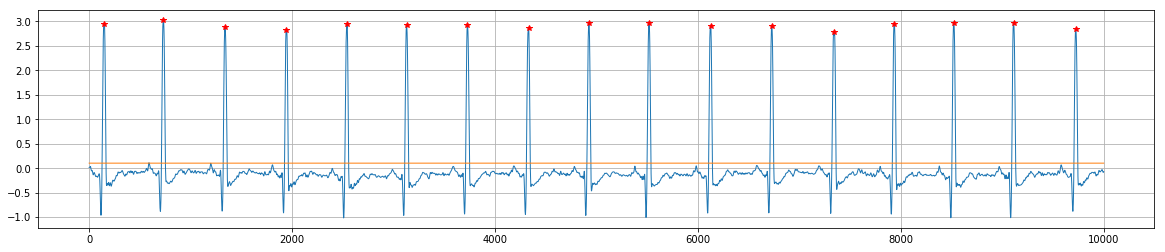

Standard_Val:  0.103125


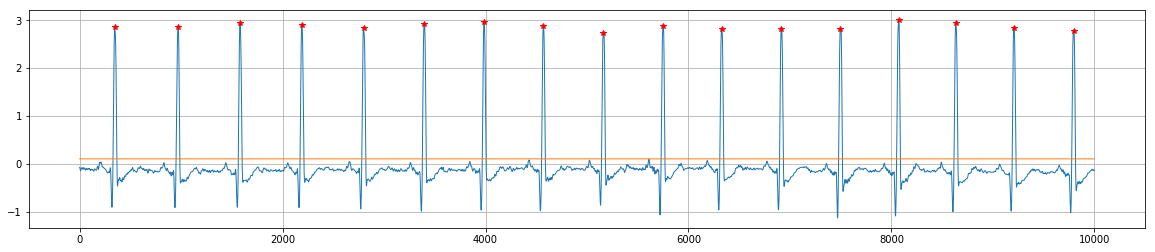

Standard_Val:  0.103125


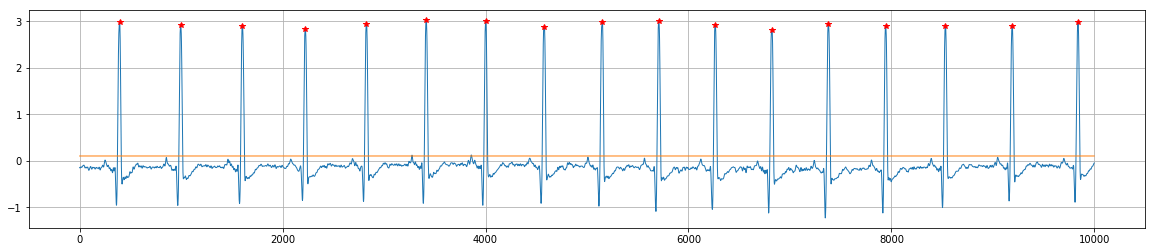

Standard_Val:  0.103125


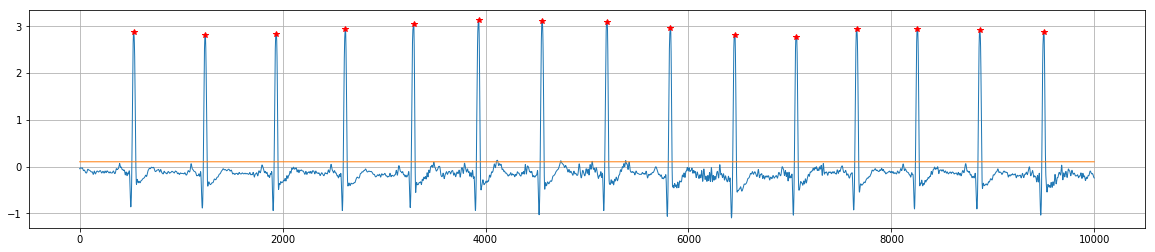

Standard_Val:  0.10312499999999994


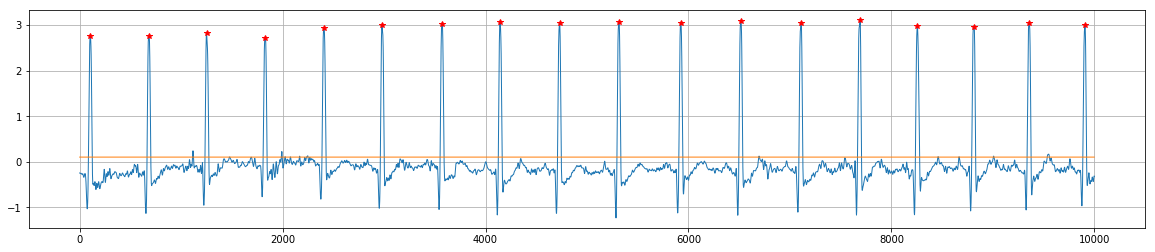

Standard_Val:  0.103125


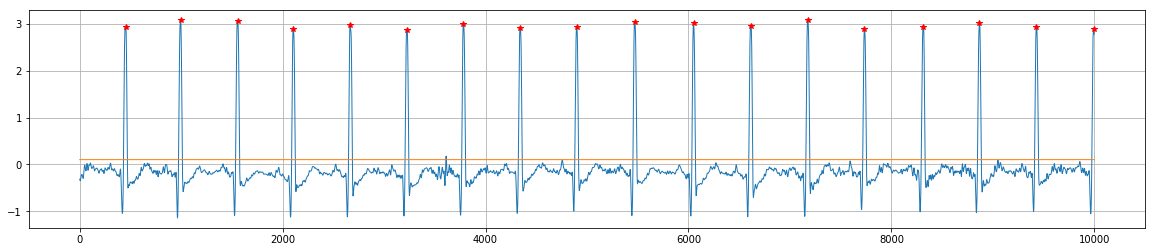

Standard_Val:  0.103125


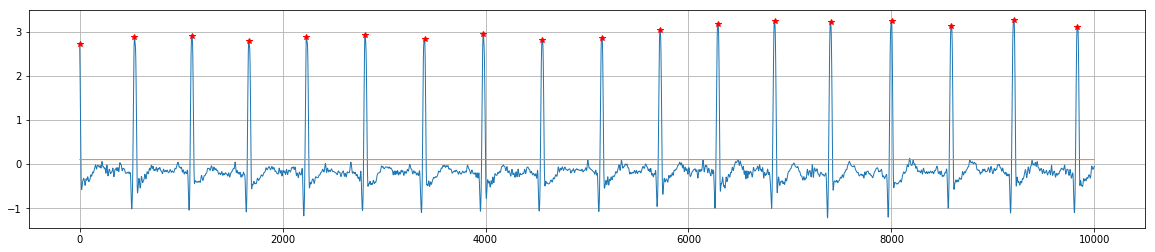

Standard_Val:  0.103125


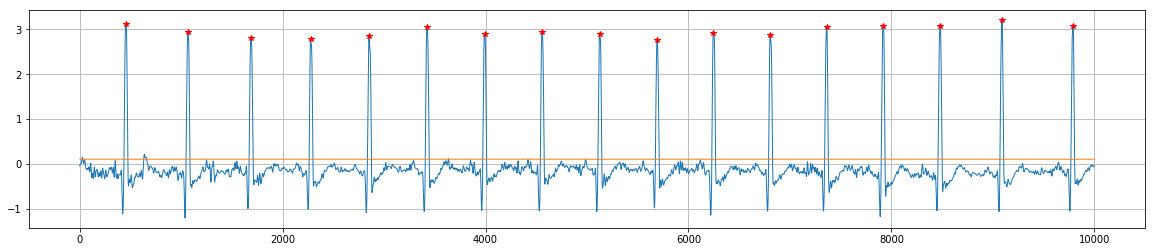

Standard_Val:  0.103125


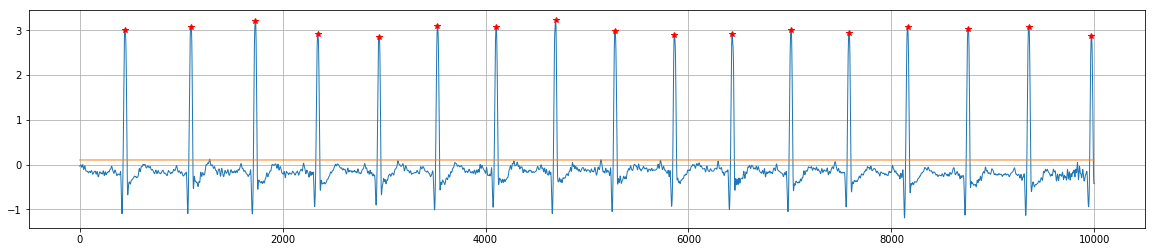

Standard_Val:  0.103125


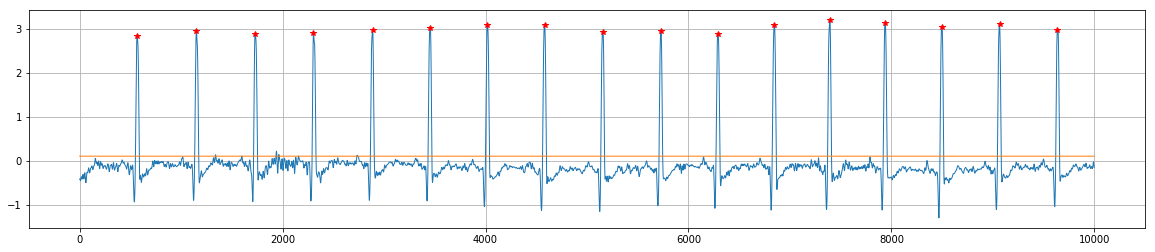

Standard_Val:  0.103125


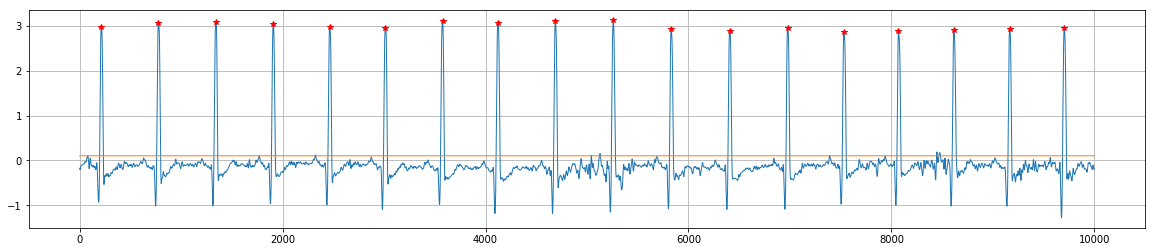

Standard_Val:  0.103125


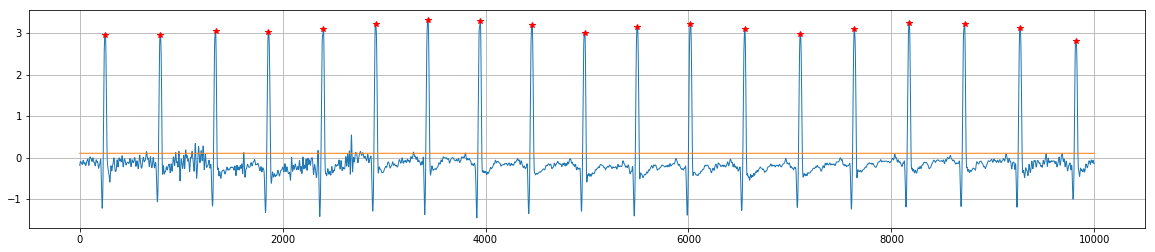

Standard_Val:  0.1031250000000001


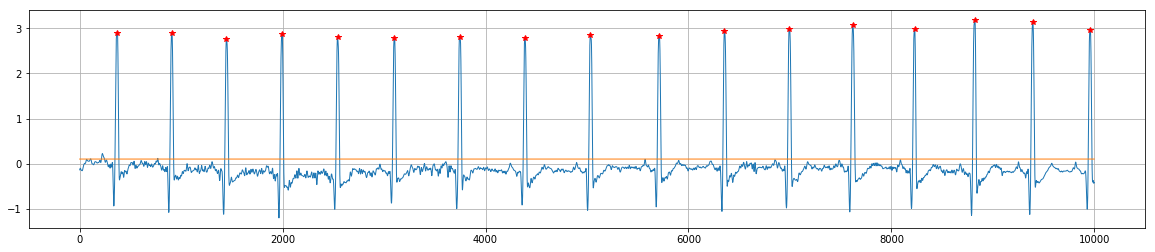

Standard_Val:  0.103125


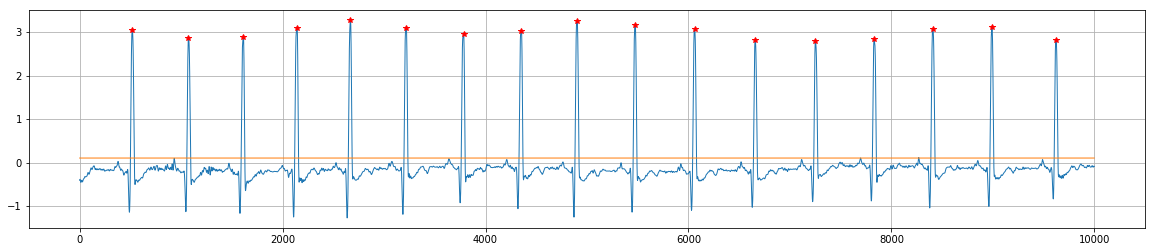

Standard_Val:  0.103125


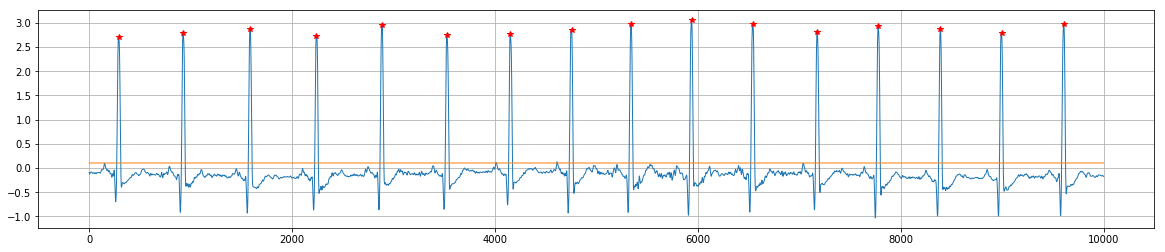

Standard_Val:  0.103125


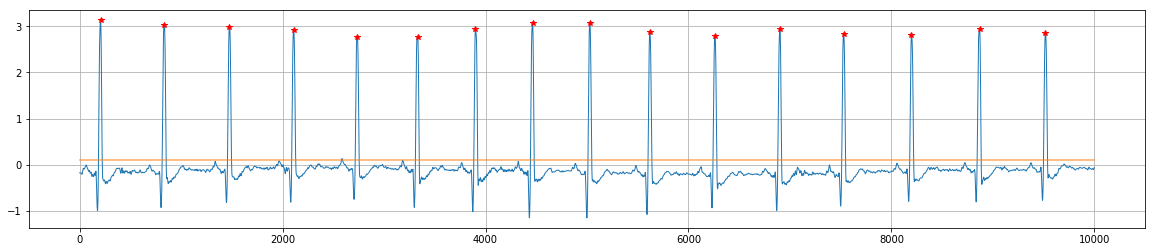

Standard_Val:  0.103125


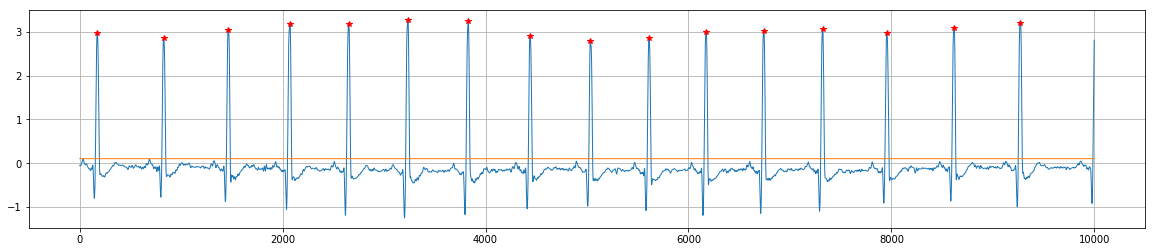

Standard_Val:  0.103125


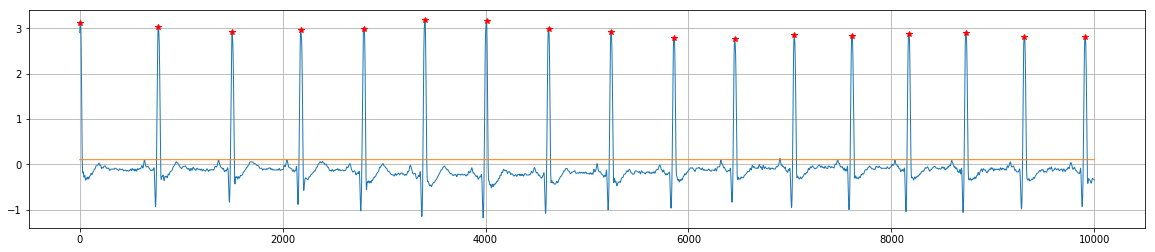

Standard_Val:  0.103125


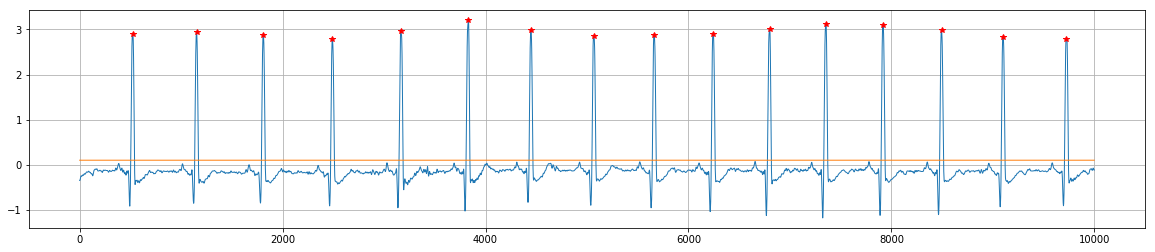

Standard_Val:  0.103125


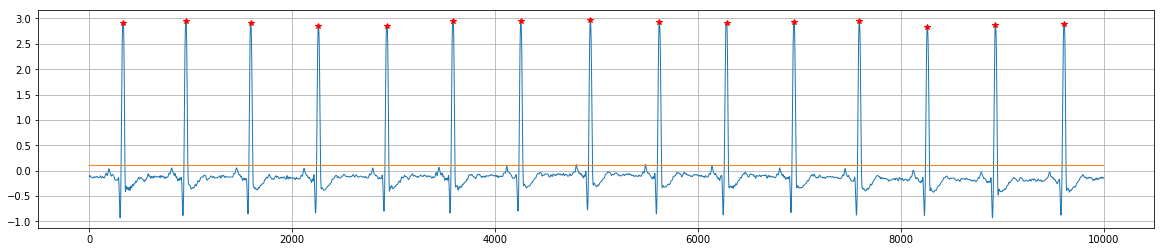

Standard_Val:  0.1031250000000001


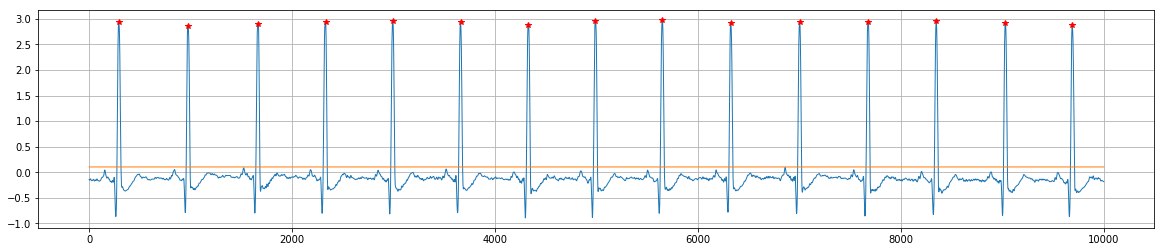

Standard_Val:  0.103125


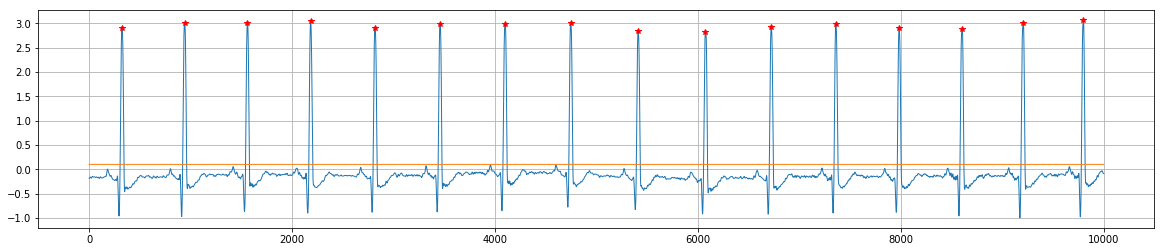

Standard_Val:  0.10312499999999995


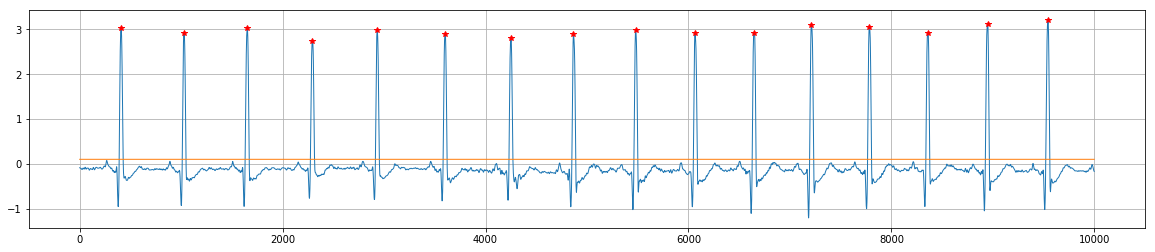

Standard_Val:  0.103125


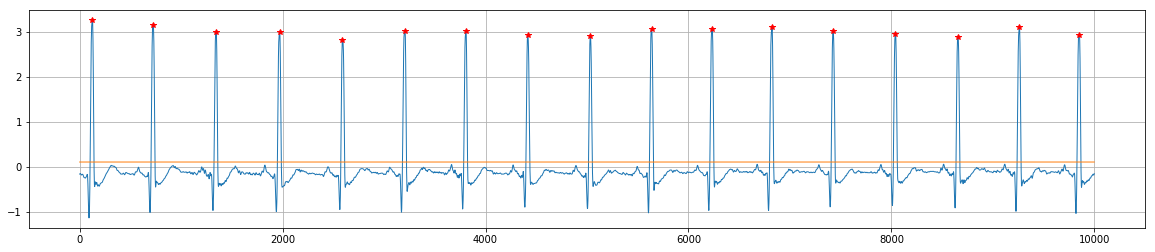

Standard_Val:  0.1031250000000001


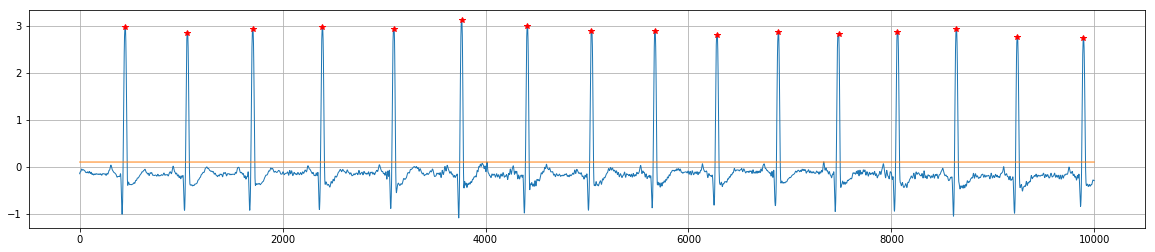

Standard_Val:  0.103125


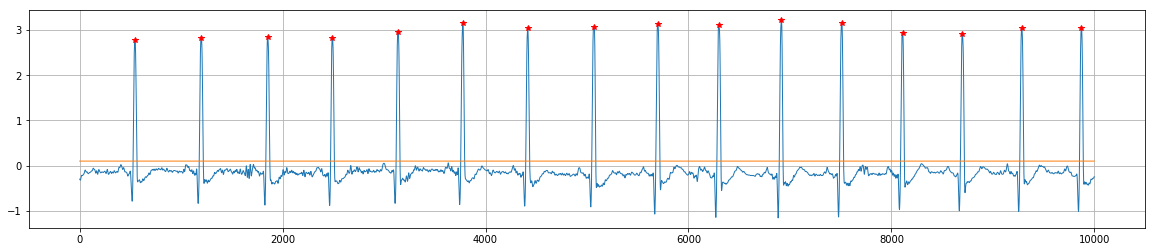

Standard_Val:  0.103125


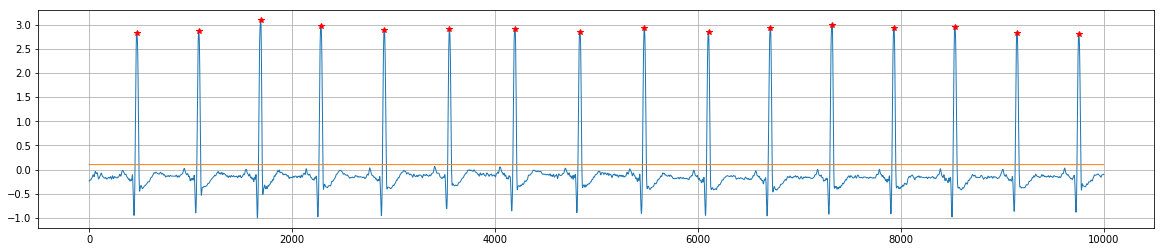

Standard_Val:  0.103125


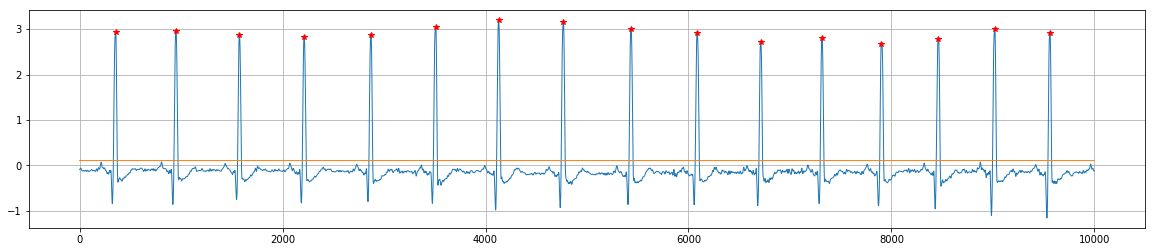

Standard_Val:  0.10312499999999995


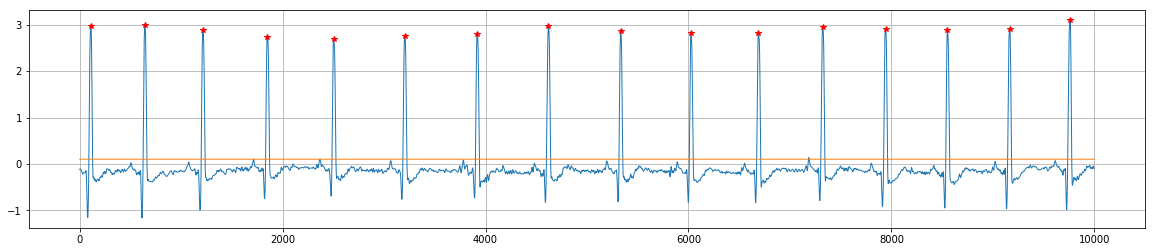

Standard_Val:  0.103125


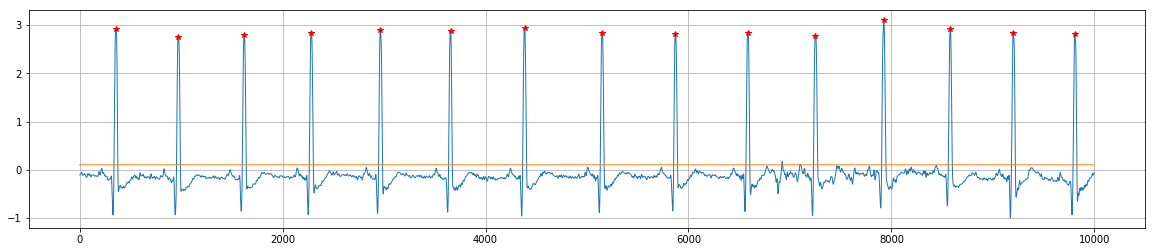

Standard_Val:  0.10312499999999988


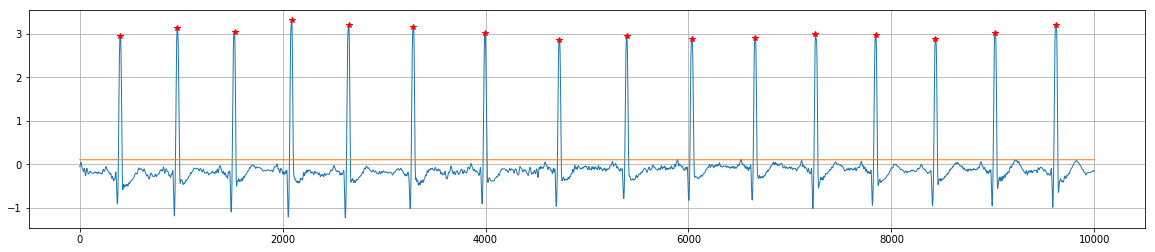

Standard_Val:  0.10312499999999995


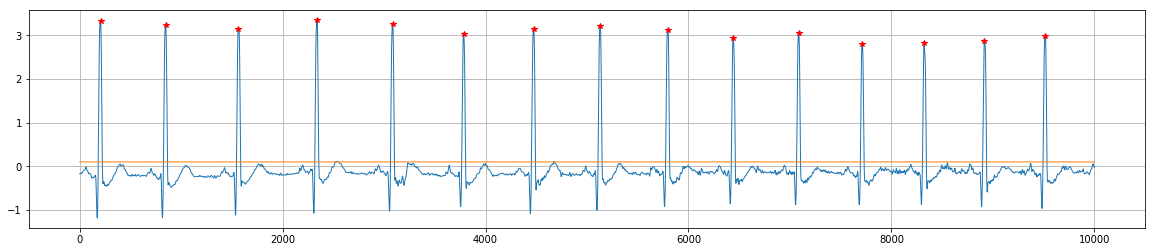

Standard_Val:  0.103125


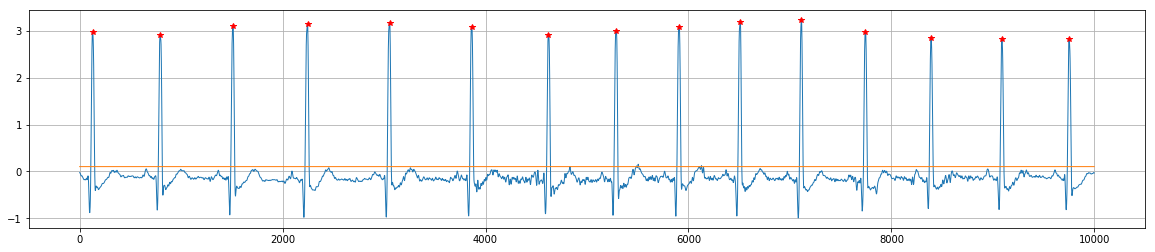

Standard_Val:  0.103125


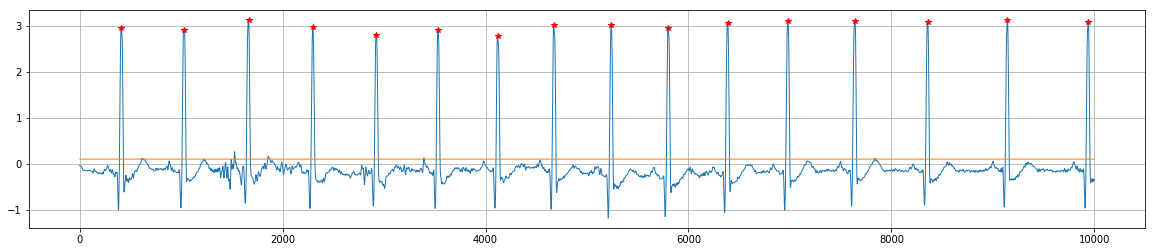

Standard_Val:  0.103125
Detect NONE


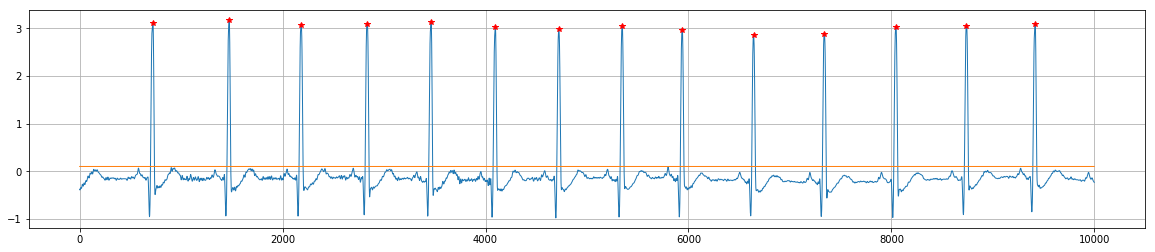

Standard_Val:  0.103125


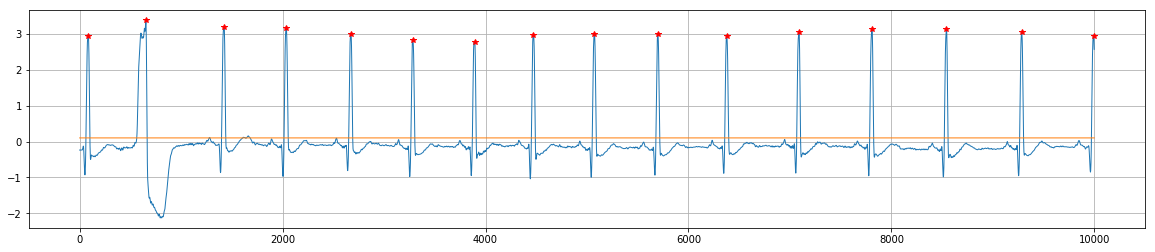

Standard_Val:  0.103125


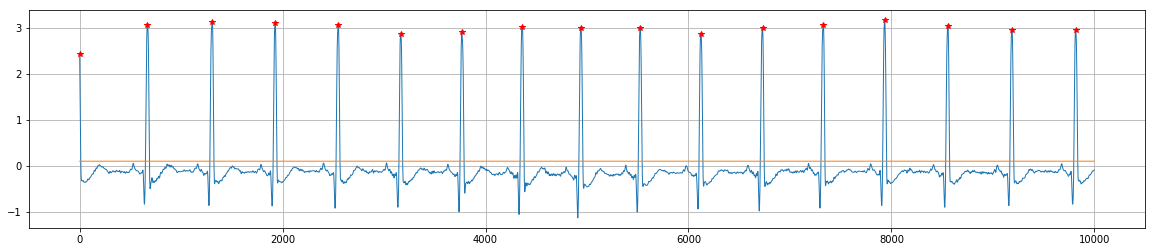

Standard_Val:  0.103125
Detect NONE


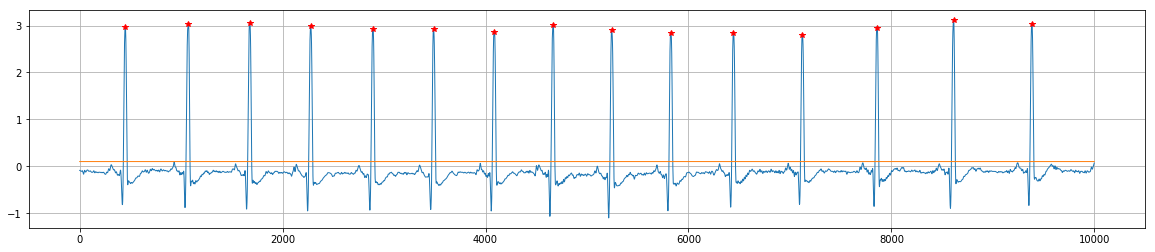

Standard_Val:  0.103125


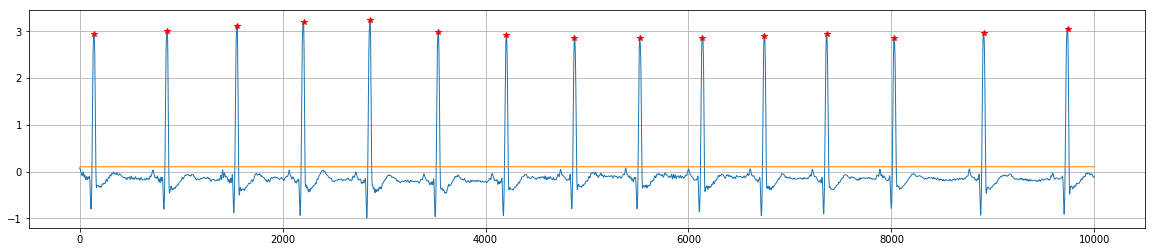

Standard_Val:  0.10312499999999994


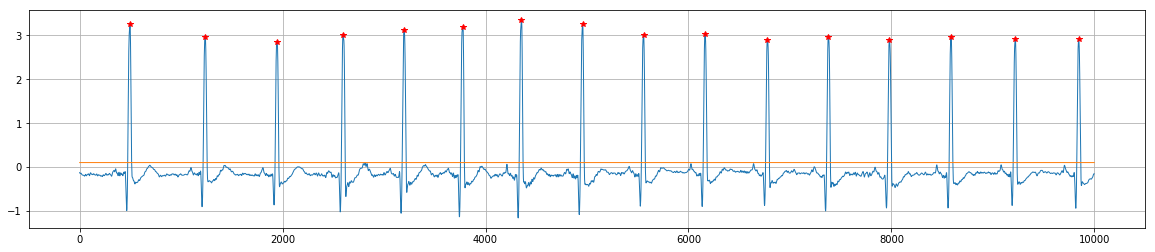

Standard_Val:  0.10312499999999995


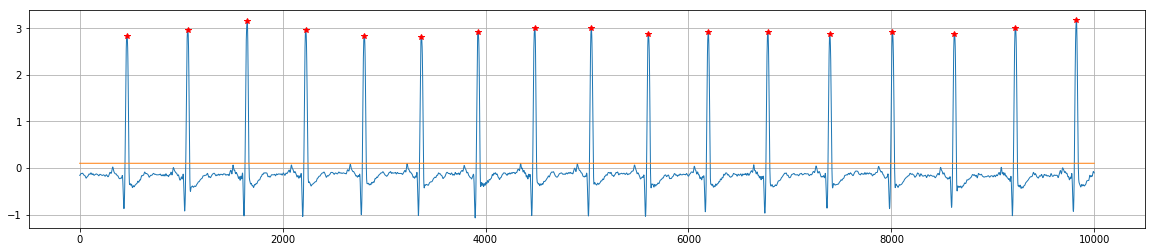

Standard_Val:  0.103125


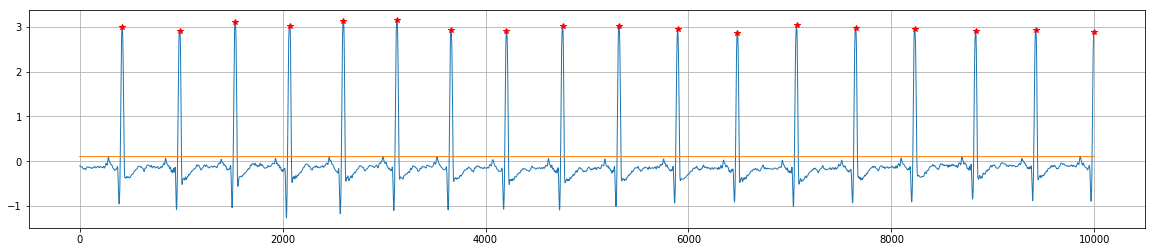

Standard_Val:  0.103125


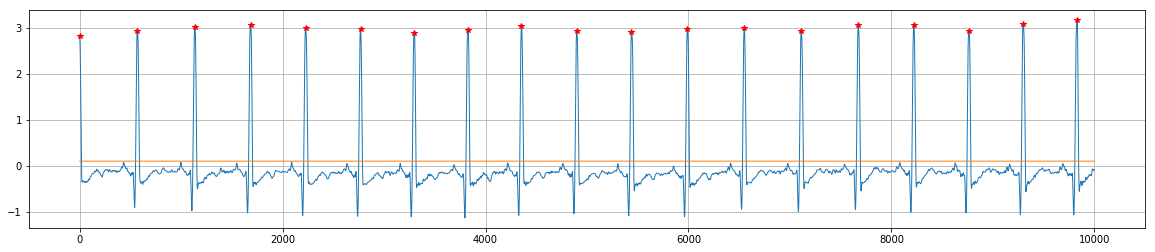

Standard_Val:  0.103125


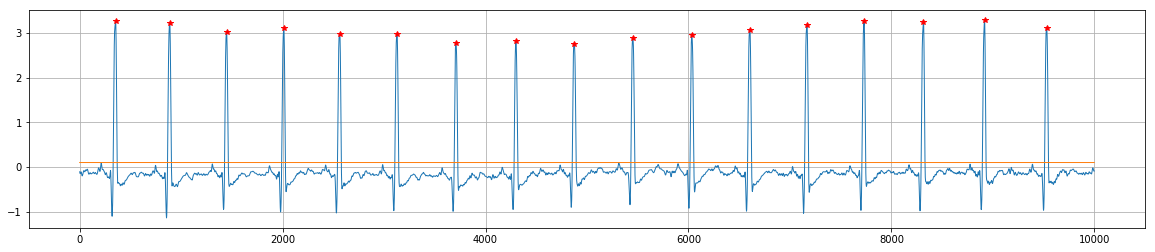

Standard_Val:  0.103125
Detect NONE


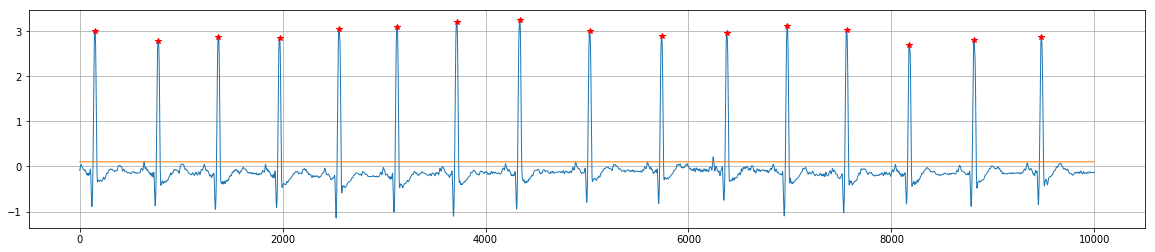

Standard_Val:  0.103125


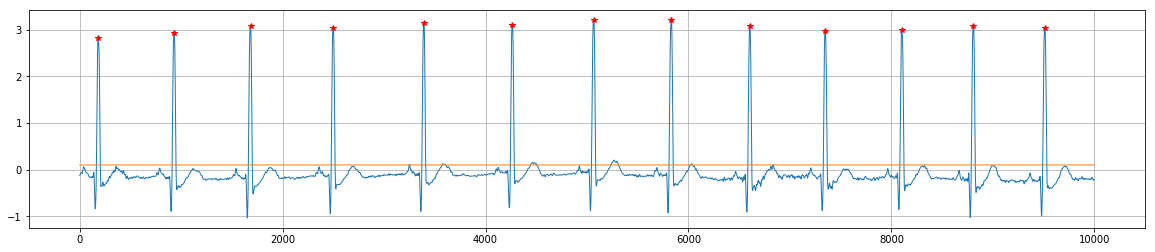

Standard_Val:  0.103125


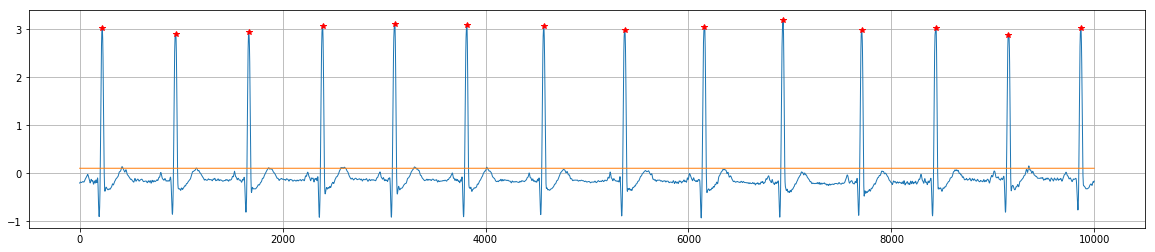

Standard_Val:  0.103125


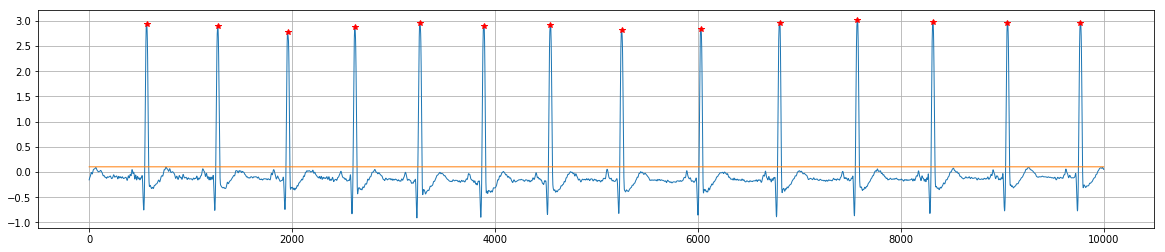

Standard_Val:  0.10312499999999994
Detect NONE


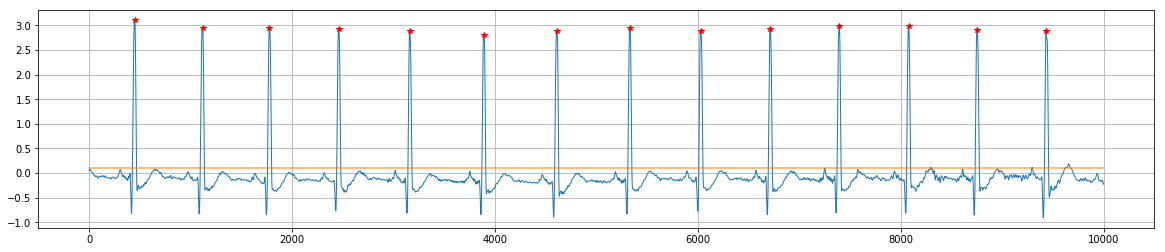

Standard_Val:  0.10312499999999995


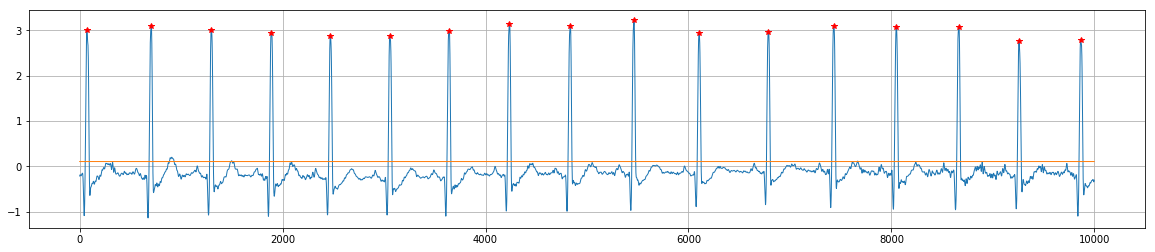

Standard_Val:  0.103125


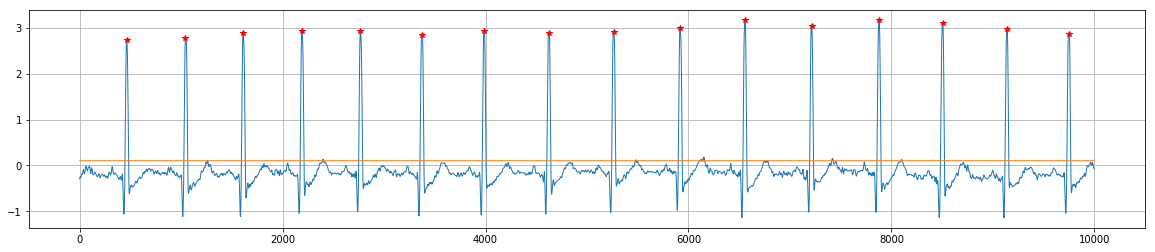

In [6]:
import wfdb as wf
from wfdb import processing

peak_index = []

## 데이터 셋에서 하나씩 가져오기.
#for i in range(0, len(one_normal)):
for i in range(0, 100):
    normal_sample = one_normal[i]
    
    ## wfdb.processing.normalize_bound
    testing_normalize= processing.normalize_bound(normal_sample, lb=-0.5, ub=1)
    ## 일반화 data^5 
    tmp = pow(testing_normalize,5)
    ## 전체 data 크기의 10%
    area_tmp = ((max(tmp) - min(tmp))/10)
    ## area_tmp 를 보여주기 위한 코드
    area_val_show = np.full(10000, area_tmp)
    
    ## 500 단위로 grid를 잘라서 피크 디덱트
    ## return 값은 peak의 index
    tmp_peak = grid_show(tmp, 500, area_tmp)
    
    peak_index.append(tmp_peak)
    
    ## 피크점을 보여주기 위한 코드
    tmp_peak_show = np.full(10000, None)
    for j in range(0, len(tmp_peak)):
        tmp_peak_show[tmp_peak[j]] = normal_sample[tmp_peak[j]]

    plt.rcParams["figure.figsize"] = (20,4)
    plt.rcParams['lines.linewidth'] = 1
    plt.rcParams['axes.grid'] = True
    plt.set_cmap = True #그림 사이즈 맞추기
    plt.plot(normal_sample)
    plt.plot(area_val_show)
    plt.plot(tmp_peak_show, 'r*')
    plt.show()

In [7]:
## peak_index.shape = [[list([282, 884, 1532, 2122, 2704, 3276, 3854, 4464, 5058, 5634, 6226, 6822, 7442, 8102, 8782, 9444])]
def selection_rule(normal_data, peak_index):
    select_mask_input = []
    for i in range (0, len(peak_index)):
        extrac_arg = []
        each_dif_list = []
        normal_sample = normal_data[i]
        peak_extrac = peak_index[i][0]
        for j_0 in range(0, len(peak_extrac)-1):   
            dif = peak_extrac[j_0+1] - peak_extrac[j_0]
            extrac_arg.append(dif)

        arg = np.average(extrac_arg)

        for j_1 in range(0, len(extrac_arg)):
            each_dif = abs(extrac_arg[j_1] - arg)
            each_dif_list.append(each_dif)

        min_dif_list = min(each_dif_list)
        for j_2 in range(0, len(each_dif_list)):
            if min_dif_list == each_dif_list[j_2]:
                select_mask = normal_sample[peak_extrac[j_2]:peak_extrac[j_2+1]]
                select_mask_input.append(select_mask)
                break
                
    return select_mask_input

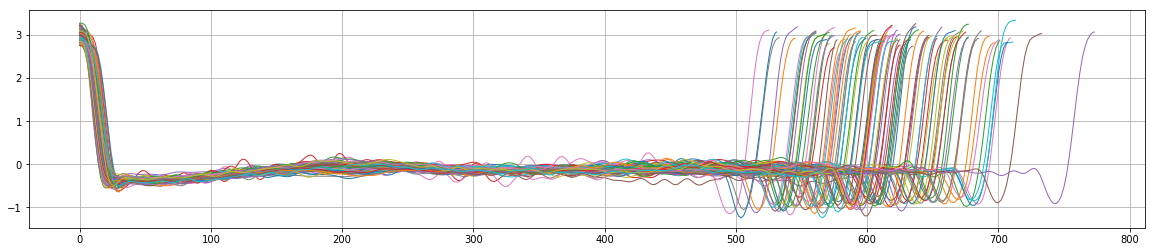

In [8]:
select_mask_input = selection_rule(one_normal, peak_index)
for i in range(0, len(select_mask_input)):
    plt.plot(select_mask_input[i])
plt.show()

In [9]:
sum_0 = 0
for i in range(0, len(select_mask_input)):
    sum_0 += len(select_mask_input[i])
mask_range = int(sum_0 / len(select_mask_input))
print('평균 index size :',mask_range)

평균 index size : 625


In [107]:
import wfdb as wf
from wfdb import processing

frequency = 500
resize_resamp = []
resize_resamt = []
for i in range(0, len(select_mask_input)):
    ## frequency : len(select_mask_input[i]) = x : mask_range
    ## len(select_mask_input[i])*x = frequency*625
    ## x = frequency * mask_range / len(select_mask_input[i])
    targer_frq = (frequency*mask_range)/len(select_mask_input[i])
    resamp = processing.resample_sig(select_mask_input[i], frequency, targer_frq)
    #resamp = np.array(resamp[0])
    #resamp_t = np.array(resamp[1])
    if len(resamp[0]) == mask_range:
        #resize_resamp.append(resamp)
        resize_resamp.append(resamp[0])
        resize_resamt.append(resamp[1][1])

In [109]:
resize_resamt = np.array(resize_resamt)
print(resize_resamt)
print(len(resize_resamt))

[0.976  0.9536 0.9184 1.0368 1.0528 1.0208 1.136  1.0752 1.0688 1.0464
 0.9824 1.1104 1.1232 1.0592 1.008  1.0368 0.9216 0.9952 1.0624 1.1392
 1.1328 1.0944 1.0848 1.0464 1.0368 0.8416 0.8544 0.9152 0.9504 0.96
 0.9344 0.8992 0.9824 0.9216 1.0016 0.928  0.9856 1.04   1.1424 1.0208
 1.0304 1.0848 1.072  0.8768 0.8992 0.8896 0.9472 0.9632 0.9568 0.944
 0.9408 1.024  0.9216 0.8992 0.9248 0.9376 0.9536 0.9088 0.8896 0.8512
 0.9472 0.912  1.0016 1.0016 0.992  0.9856 1.0592 1.0752 1.0144 0.9824
 0.9696 1.0112 0.9984 0.9984 0.992  1.0176 1.0784 0.9984 1.0688 1.1168
 1.0144 1.0816 1.0848 0.9824 0.9952 1.1008 0.9984 0.9376 0.912  0.8736
 0.9152 0.992  1.2384 1.1744 1.1232 1.0976 0.9856 0.9792]
98


np.save('./np.save/resamp.npy', resize_resamp)

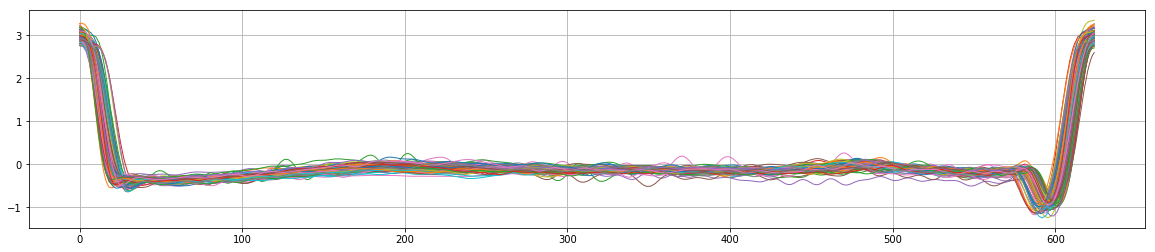

data_size : 625
data_shape : (98, 625)


In [110]:
for i in range(0, len(resize_resamp)):
    plt.plot(resize_resamp[i])
plt.show()
print('data_size :',mask_range)
resize_resamp = np.array(resize_resamp)
print('data_shape :',resize_resamp.shape)

In [24]:
### 옵션설정
learning_rate = 0.01 #최적화 함수 학습률
train_epoch = 1000     #학습 횟수

x_input = mask_range      #입력 데이터
output = mask_range       #출력 데이터

#hidden layer 
#input (mask_range) -> h1(500) -> h2(300) -> h3(100) -> h2 -> h1 -> output(mask_range) 구조  #7 layer
n_hidden_1 = 500 
n_hidden_2 = 350
n_hidden_3 = 100


In [30]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None,x_input], name='X')

## 500
with tf.name_scope('encoding_hidden_layer_1'):
    enc_W1 = tf.Variable(tf.random_normal([x_input, n_hidden_1], stddev=0.01))
    enc_b1 = tf.Variable(tf.random_normal([n_hidden_1]))
    enc_L1 = tf.add(tf.matmul(X, enc_W1), enc_b1)
    #enc_L1 = tf.nn.sigmoid(enc_L1)

## 250
with tf.name_scope('encoding_hidden_layer_2'):
    enc_W2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev=0.01))
    enc_b2 = tf.Variable(tf.random_normal([n_hidden_2]))
    enc_L2 = tf.add(tf.matmul(enc_L1, enc_W2), enc_b2)
    enc_L2 = tf.nn.sigmoid(enc_L2)

## 100
#with tf.name_scope('encoding_hidden_layer_3'):    
#    Weight_enc = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3], stddev=0.01))
#    bias_enc = tf.Variable(tf.random_normal([n_hidden_3]))
#    function_enc = tf.add(tf.matmul(enc_L2, Weight_enc), bias_enc)
    
## 250
#with tf.name_scope('decoding_hidden_layer_2'):
#    dec_W2 = tf.Variable(tf.random_normal([n_hidden_3, n_hidden_2], stddev=0.01))
#    dec_b2 = tf.Variable(tf.random_normal([n_hidden_2]))
#    dec_L2 = tf.add(tf.matmul(function_enc, dec_W2), dec_b2)
#    dec_L2 = tf.nn.sigmoid(dec_L2)
    
## 500
with tf.name_scope('decoding_hidden_layer_1'):
    dec_W1 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1], stddev=0.01))
    dec_b1 = tf.Variable(tf.random_normal([n_hidden_1]))
    dec_L1 = tf.add(tf.matmul(enc_L2, dec_W1), dec_b1)
    #dec_L1 = tf.nn.sigmoid(dec_L1)
    
## mask_range
with tf.name_scope('output_layer'):
    Weight_out = tf.Variable(tf.random_normal([n_hidden_1, output], stddev=0.01))
    bias_out = tf.Variable(tf.random_normal([output]))
    logit = tf.add(tf.matmul(dec_L1, Weight_out), bias_out)
    model = tf.nn.sigmoid(logit)

cost = tf.reduce_mean(pow(X - model,2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [41]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None,x_input], name='X')

## 500
with tf.name_scope('encoding_hidden_layer_1'):
    enc_W1 = tf.Variable(tf.random_normal([x_input, n_hidden_1], stddev=0.01))
    enc_b1 = tf.Variable(tf.random_normal([n_hidden_1]))
    enc_L1 = tf.add(tf.matmul(X, enc_W1), enc_b1)
    enc_L1 = tf.nn.sigmoid(enc_L1)

## 250
with tf.name_scope('encoding_hidden_layer_2'):
    enc_W2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev=0.01))
    enc_b2 = tf.Variable(tf.random_normal([n_hidden_2]))
    enc_L2 = tf.add(tf.matmul(enc_L1, enc_W2), enc_b2)
    enc_L2 = tf.nn.sigmoid(enc_L2)

## 100
with tf.name_scope('encoding_hidden_layer_3'):    
    Weight_enc = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3], stddev=0.01))
    bias_enc = tf.Variable(tf.random_normal([n_hidden_3]))
    function_enc = tf.add(tf.matmul(enc_L2, Weight_enc), bias_enc)
    
## 250
with tf.name_scope('decoding_hidden_layer_2'):
    dec_W2 = tf.Variable(tf.random_normal([n_hidden_3, n_hidden_2], stddev=0.01))
    dec_b2 = tf.Variable(tf.random_normal([n_hidden_2]))
    dec_L2 = tf.add(tf.matmul(function_enc, dec_W2), dec_b2)
    dec_L2 = tf.nn.sigmoid(dec_L2)
    
## 500
with tf.name_scope('decoding_hidden_layer_1'):
    dec_W1 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1], stddev=0.01))
    dec_b1 = tf.Variable(tf.random_normal([n_hidden_1]))
    dec_L1 = tf.add(tf.matmul(enc_L2, dec_W1), dec_b1)
    dec_L1 = tf.nn.sigmoid(dec_L1)
    
## mask_range
with tf.name_scope('output_layer'):
    Weight_out = tf.Variable(tf.random_normal([n_hidden_1, output], stddev=0.01))
    bias_out = tf.Variable(tf.random_normal([output]))
    logit = tf.add(tf.matmul(dec_L1, Weight_out), bias_out)
    model = tf.nn.sigmoid(logit)

cost = tf.reduce_mean(pow(X - model,2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [36]:
import wfdb as wf
from wfdb import processing

resize_resamp = processing.normalize_bound(resize_resamp, lb=0, ub=1)

In [42]:
#===========세션부===================================
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

#batch_size = 500
#total_batch = int(x_input / batch_size)
model_result = []

for epoch in range(300):
    total_cost = 0
    
    _, cost_val, output_model = sess.run([optimizer, cost, model], feed_dict={X:resize_resamp})
    model_result.append(output_model)
    total_cost +=cost_val        
    print('Epoch:', '%04d' % (epoch+1),'/1000', 'cost_val:', cost_val)
    
print('Total_Cost: ', total_cost/train_epoch)
print('최적화완료')

Epoch: 0001 /1000 cost_val: 0.12283004
Epoch: 0002 /1000 cost_val: 0.037872106
Epoch: 0003 /1000 cost_val: 0.013213655
Epoch: 0004 /1000 cost_val: 0.011742663
Epoch: 0005 /1000 cost_val: 0.008179923
Epoch: 0006 /1000 cost_val: 0.009415426
Epoch: 0007 /1000 cost_val: 0.0067522842
Epoch: 0008 /1000 cost_val: 0.0048835794
Epoch: 0009 /1000 cost_val: 0.004950197
Epoch: 0010 /1000 cost_val: 0.004954038
Epoch: 0011 /1000 cost_val: 0.0039373273
Epoch: 0012 /1000 cost_val: 0.003084892
Epoch: 0013 /1000 cost_val: 0.0027419645
Epoch: 0014 /1000 cost_val: 0.0025011452
Epoch: 0015 /1000 cost_val: 0.0021679911
Epoch: 0016 /1000 cost_val: 0.0018665232
Epoch: 0017 /1000 cost_val: 0.0017504484
Epoch: 0018 /1000 cost_val: 0.0017698343
Epoch: 0019 /1000 cost_val: 0.0017575431
Epoch: 0020 /1000 cost_val: 0.0016716325
Epoch: 0021 /1000 cost_val: 0.0015952927
Epoch: 0022 /1000 cost_val: 0.0015665793
Epoch: 0023 /1000 cost_val: 0.0015380732
Epoch: 0024 /1000 cost_val: 0.0014627149
Epoch: 0025 /1000 cost_val

Epoch: 0211 /1000 cost_val: 0.00095827045
Epoch: 0212 /1000 cost_val: 0.0009576959
Epoch: 0213 /1000 cost_val: 0.000957068
Epoch: 0214 /1000 cost_val: 0.0009563623
Epoch: 0215 /1000 cost_val: 0.00095558685
Epoch: 0216 /1000 cost_val: 0.00095471233
Epoch: 0217 /1000 cost_val: 0.0009537466
Epoch: 0218 /1000 cost_val: 0.0009526677
Epoch: 0219 /1000 cost_val: 0.0009514854
Epoch: 0220 /1000 cost_val: 0.00095017866
Epoch: 0221 /1000 cost_val: 0.00094875327
Epoch: 0222 /1000 cost_val: 0.0009472009
Epoch: 0223 /1000 cost_val: 0.0009455162
Epoch: 0224 /1000 cost_val: 0.00094369455
Epoch: 0225 /1000 cost_val: 0.00094174134
Epoch: 0226 /1000 cost_val: 0.00093966903
Epoch: 0227 /1000 cost_val: 0.00093774835
Epoch: 0228 /1000 cost_val: 0.0009383071
Epoch: 0229 /1000 cost_val: 0.0009637352
Epoch: 0230 /1000 cost_val: 0.0010311762
Epoch: 0231 /1000 cost_val: 0.0009822584
Epoch: 0232 /1000 cost_val: 0.00092845486
Epoch: 0233 /1000 cost_val: 0.0009595893
Epoch: 0234 /1000 cost_val: 0.00093088334
Epoch:

In [44]:
model_result = np.array(model_result)
print(model_result.shape)

(300, 98, 625)


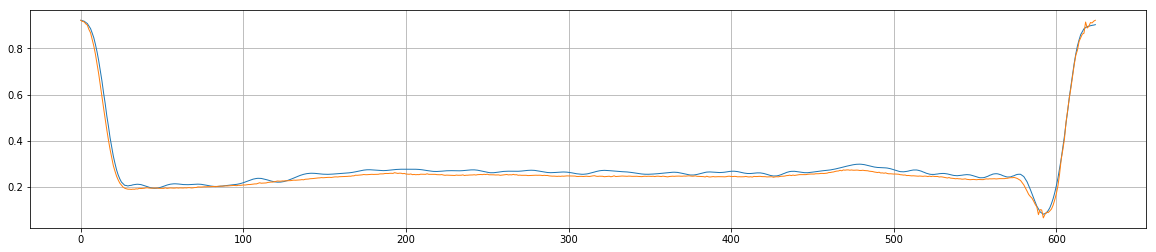

In [52]:
plt.plot(resize_resamp[0])
plt.plot(model_result[299, 0])
plt.show()

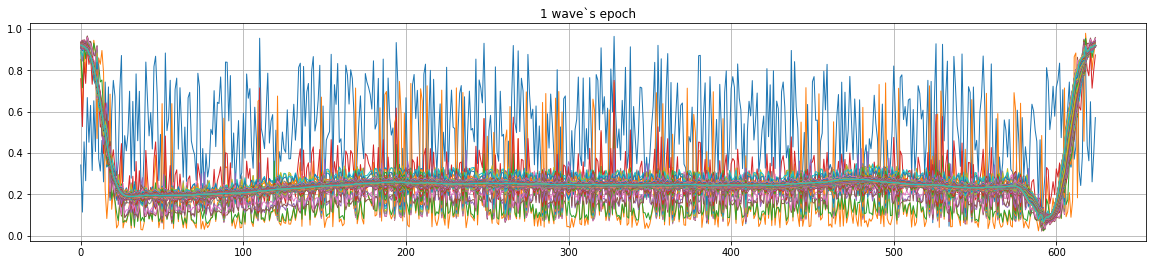

In [54]:
for i in range(0, len(model_result)):
    plt.plot(model_result[i,0])
    
plt.title('1 wave`s epoch')
plt.show()

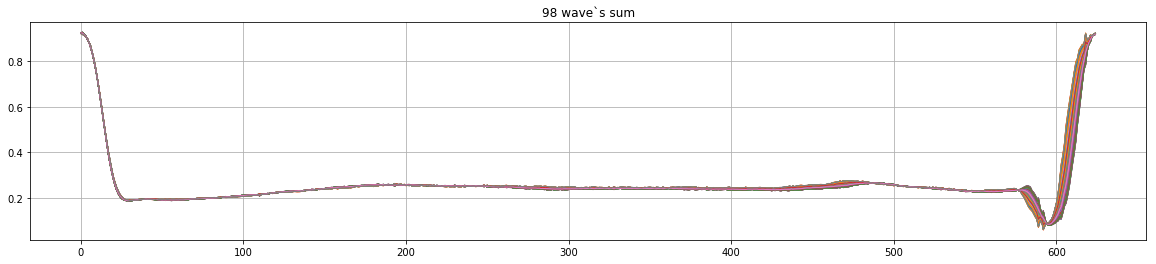

In [56]:
for i in range(0, len(model_result[299])):
    plt.plot(model_result[299,i])
    
plt.title('98 wave`s sum')
plt.show()

In [127]:
import wfdb as wf
from wfdb import processing
    
frequency = 500
model_original = []
for i in range(0, len(resize_resamp)):
    ## 500 : 1 = x : resize_resamt[i]
    ## -> x = resize_resamt[i] * 500(frequency)
    #resampfreq = (1*mask_range)/resize_resamt[i]
    resampfreq = (1*mask_range)/resize_resamt[i]
    resamp = processing.resample_sig(model_result[299,i], resampfreq, frequency)
    model_original.append(resamp[0])


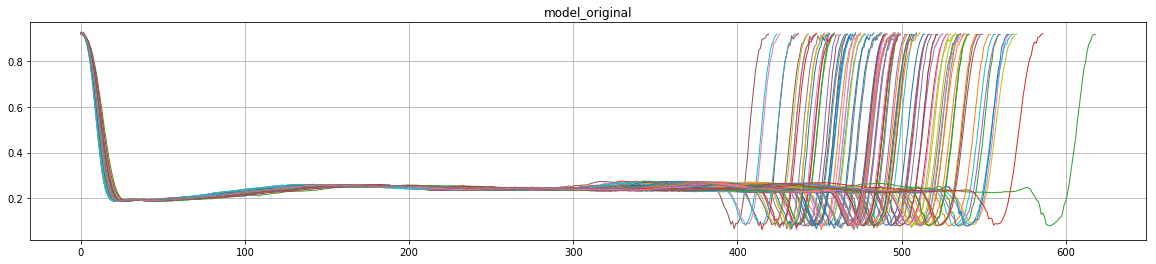

In [128]:
for i in range(0, len(model_original)):
    plt.plot(model_original[i])
    
plt.title('model_original')
plt.show()

# Data 합치기

In [62]:
max_model = []
min_model = []
for i in range(0, mask_range):    
    extrac_list = []
    for j_0 in range(0, len(resize_resamp)):
        model_data = model_result[-1, j_0, i]
        extrac_list.append(model_data)
        
    max_extrac = max(extrac_list)
    min_extrac = min(extrac_list)
    max_model.append(max_extrac)
    min_model.append(min_extrac)

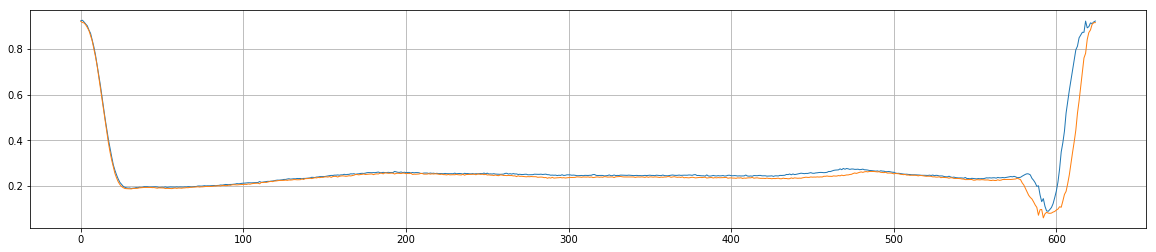

In [63]:
plt.plot(max_model)
plt.plot(min_model)
plt.show()

In [149]:
#mask_normal

#for i in range(0, len()):
for i in range(0, 1):
    normal_sample = mask_normal[i][:,0]
    
    discriminator = []
    for j_total in range(0, len(normal_sample) - mask_range):
        
        discriminator_detail = []
        for j_each in range(mask_range):
            sample_data = normal_sample[j_each+j_total]
            max_data = max_model[j_each]
            min_data = min_model[j_each]
            
            if min_data <= sample_data and sample_data <= max_data :
                if j_total % mask_range == 0:
                    disc = mask_range
                elif j_total != 0 and j_total < mask_range:
                    disc = (mask_range-j_total)/mask_range
                else:
                    1 / mask_range
            else :
                disc = 0
                discriminator_detail.append(disc)
        
        discriminator_detail = np.array(discriminator_detail)
        discriminator.append(discriminator_detail)
        #discriminator_detail = discriminator_detail/mask_range
        

In [152]:
print(discriminator)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

